 **The goal of this project is to identify natural groupings within the dataset by performing exploratory clustering, an unsupervised learning technique, to segment customers effectively.**

# Setting up project

In [1]:
# Installing kneed

!pip install kneed
!pip install kneed[plot]

In [2]:
# Importing Libraries

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import colors
from itertools import product
import missingno

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture


from kneed import KneeLocator
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances

import warnings
warnings.filterwarnings("ignore")

In [4]:
og_df = pd.read_csv('Customer_Data-kaggle.csv')

# Analysing data

In [5]:
df1 = og_df.copy()

In [6]:
# Checking the data
df1.head()

,ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
# Understanding the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
df1.describe(include='all')

,ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C19190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


In [9]:
#Checking for missing values
df1.isnull().sum()

,0
ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [10]:
# remove id as its irrelevant and a categorical data
df1.drop(['ID'], axis=1, inplace=True)

### Visualising original data

<Axes: >

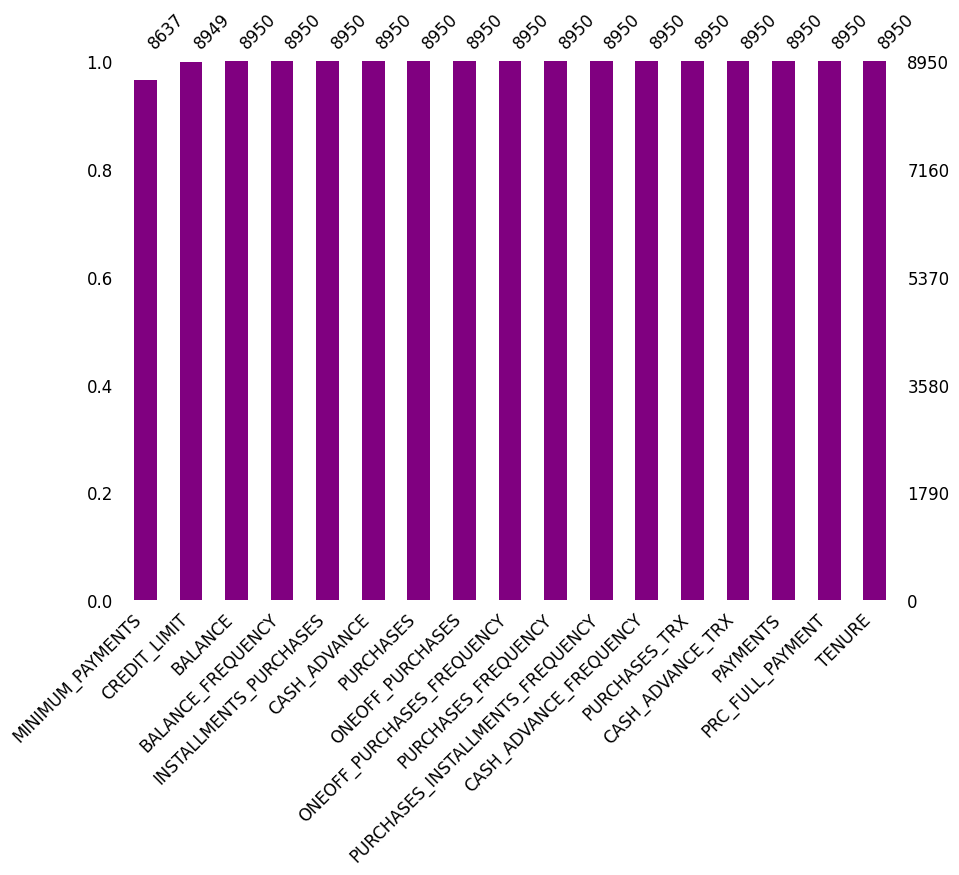

In [11]:
# Visualising the missing data, to check if its significantly missing.
missingno.bar(df1,color="purple", sort="ascending", figsize=(10,7), fontsize=12)

In [12]:
# Checking for any duplicate values
df1[df1.duplicated()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


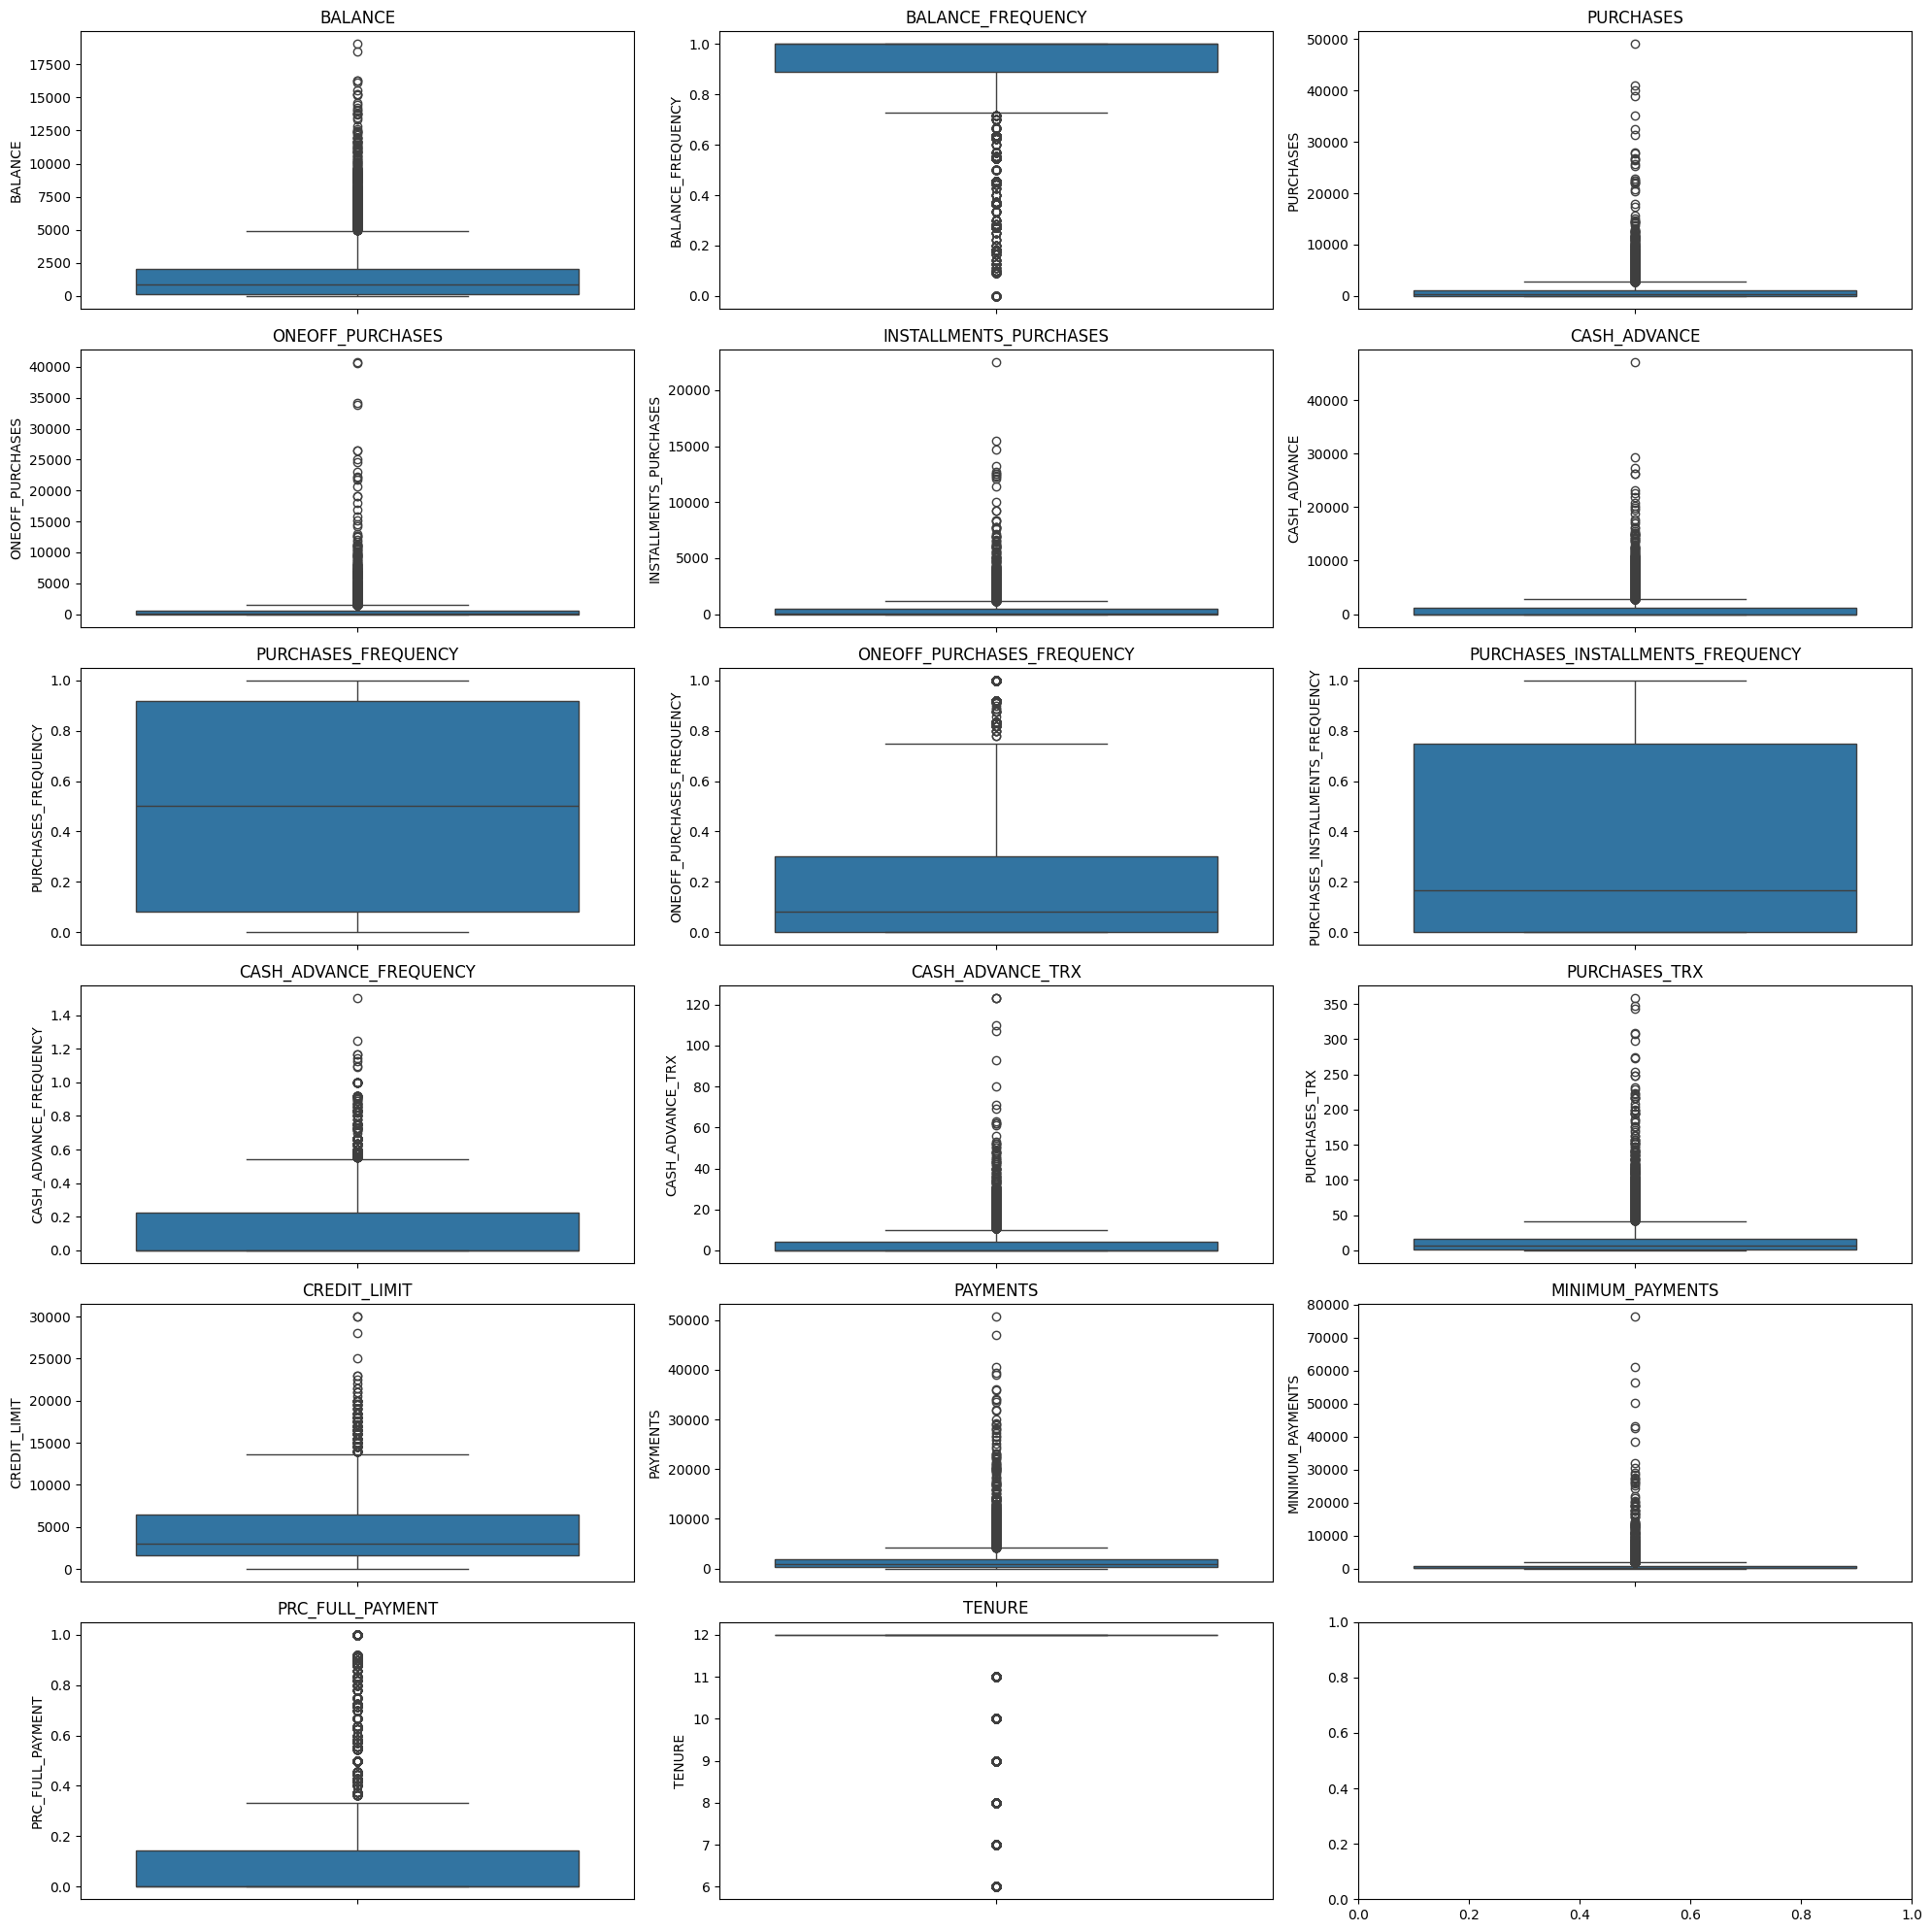

In [13]:
# Visualising the subplots for all features

fig= plt.subplots(nrows=6 , ncols=3 , figsize=(20,20))
for i in range (len(df1.columns)):
    plt.subplot(6,3,i+1)
    ax= sns.boxplot(df1[df1.columns[i]])
    plt.title(df1.columns[i])
    plt.tight_layout()
plt.show()

We can clearly see that there are outliers, however the outliers seem to be a result of some VIP customers with High purchases, credit limits etc.

# Cleaning data

### Using Iterative imputer to handle missing data

In [14]:
df2 = df1.copy()

Using the initial strategy to the median of the non-missing values in each column. The min value of the credit limit and minimum payment can not be less than 0, so the min value is set at 0. To ensure reproducibility of the results I set the random state (I am doing the project in 2025)

In [15]:
# Handling missing value using iterative imputer

feat_cols = [col for col in df2.columns]

itr_imputer = IterativeImputer(initial_strategy='median',
                               min_value=0, random_state=2025)

df2[feat_cols] = itr_imputer.fit_transform(df2[feat_cols])

In [16]:
# confimring missing data has been filled
df2.isnull().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

### Visualising data after imputation

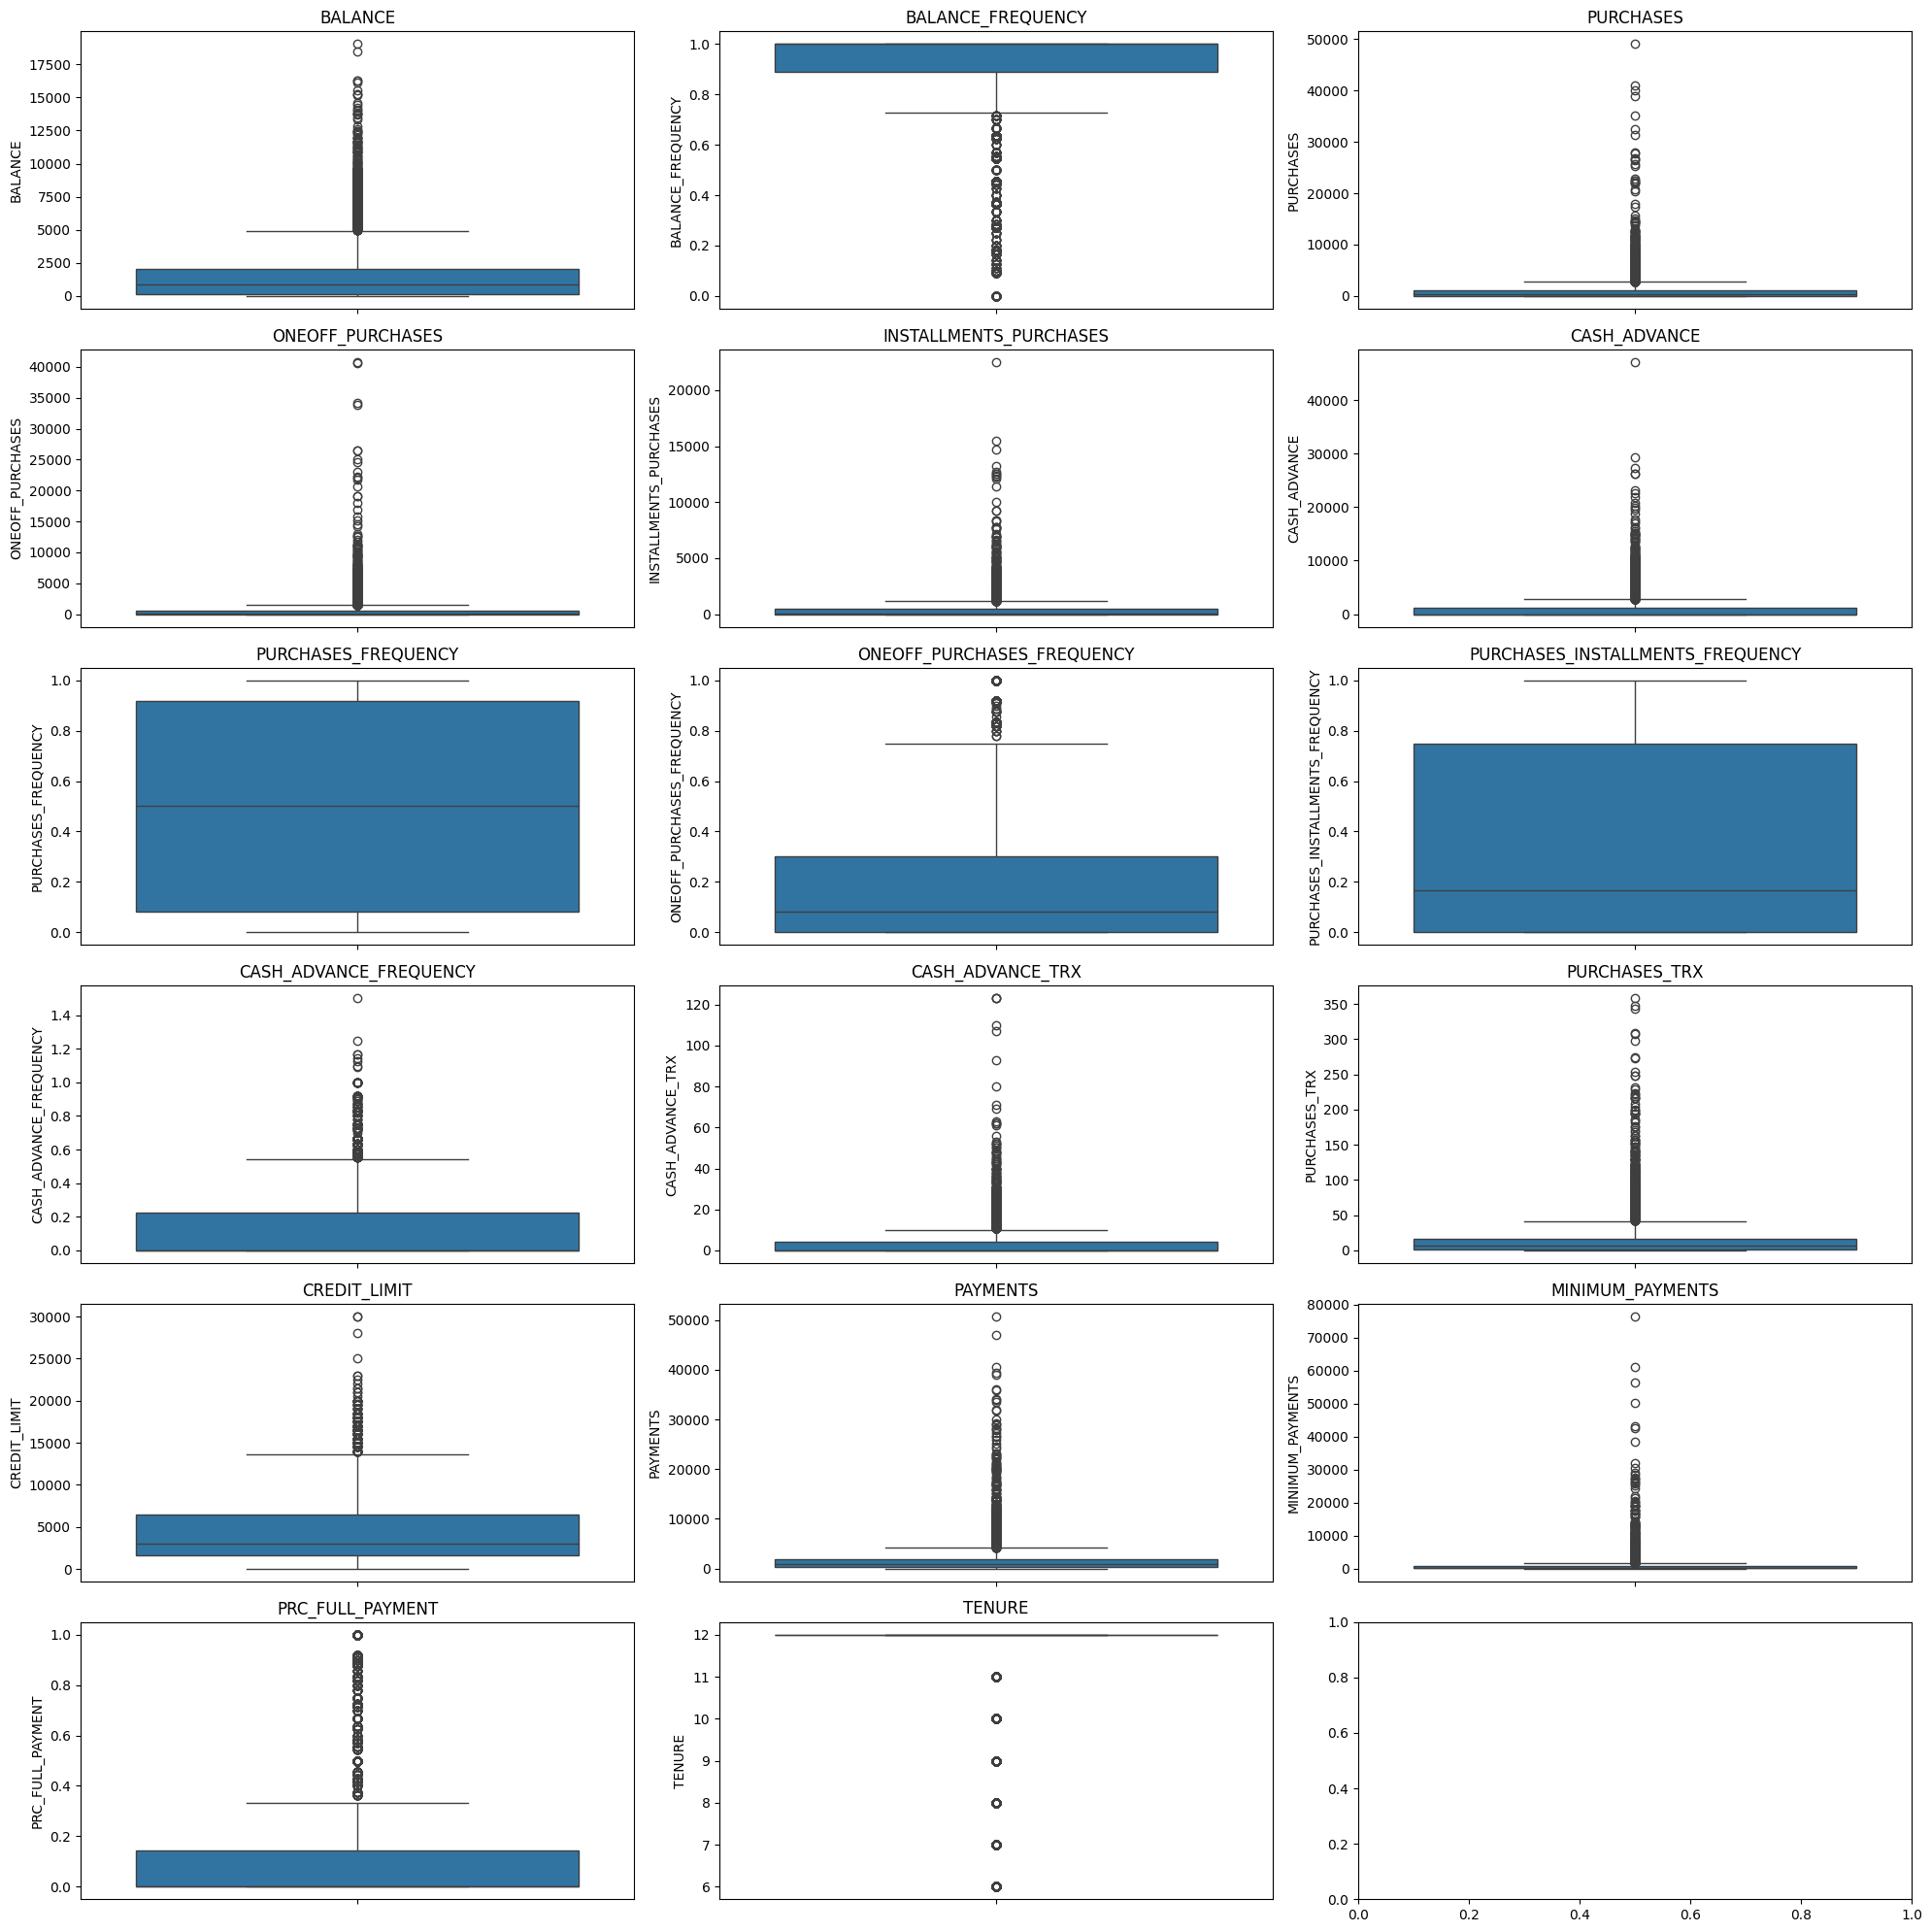

In [18]:
# Visualising the subplots for all features (after imputation)

fig2= plt.subplots(nrows=6 , ncols=3 , figsize=(20,20))
for i in range (len(df2.columns)):
    plt.subplot(6,3,i+1)
    ax= sns.boxplot(df2[df2.columns[i]])
    plt.title(df2.columns[i])
    plt.tight_layout()
plt.show()

### Summary


Handled missing data using iterative imputer, the data trend seems to remain unchanged, indicating the imputation process was successful and was minimally invasive to the data's integrity. Kept the outliers to represent the potential VIP customers.

# Feature Selection

## Checking correlations between the features using a heatmap.



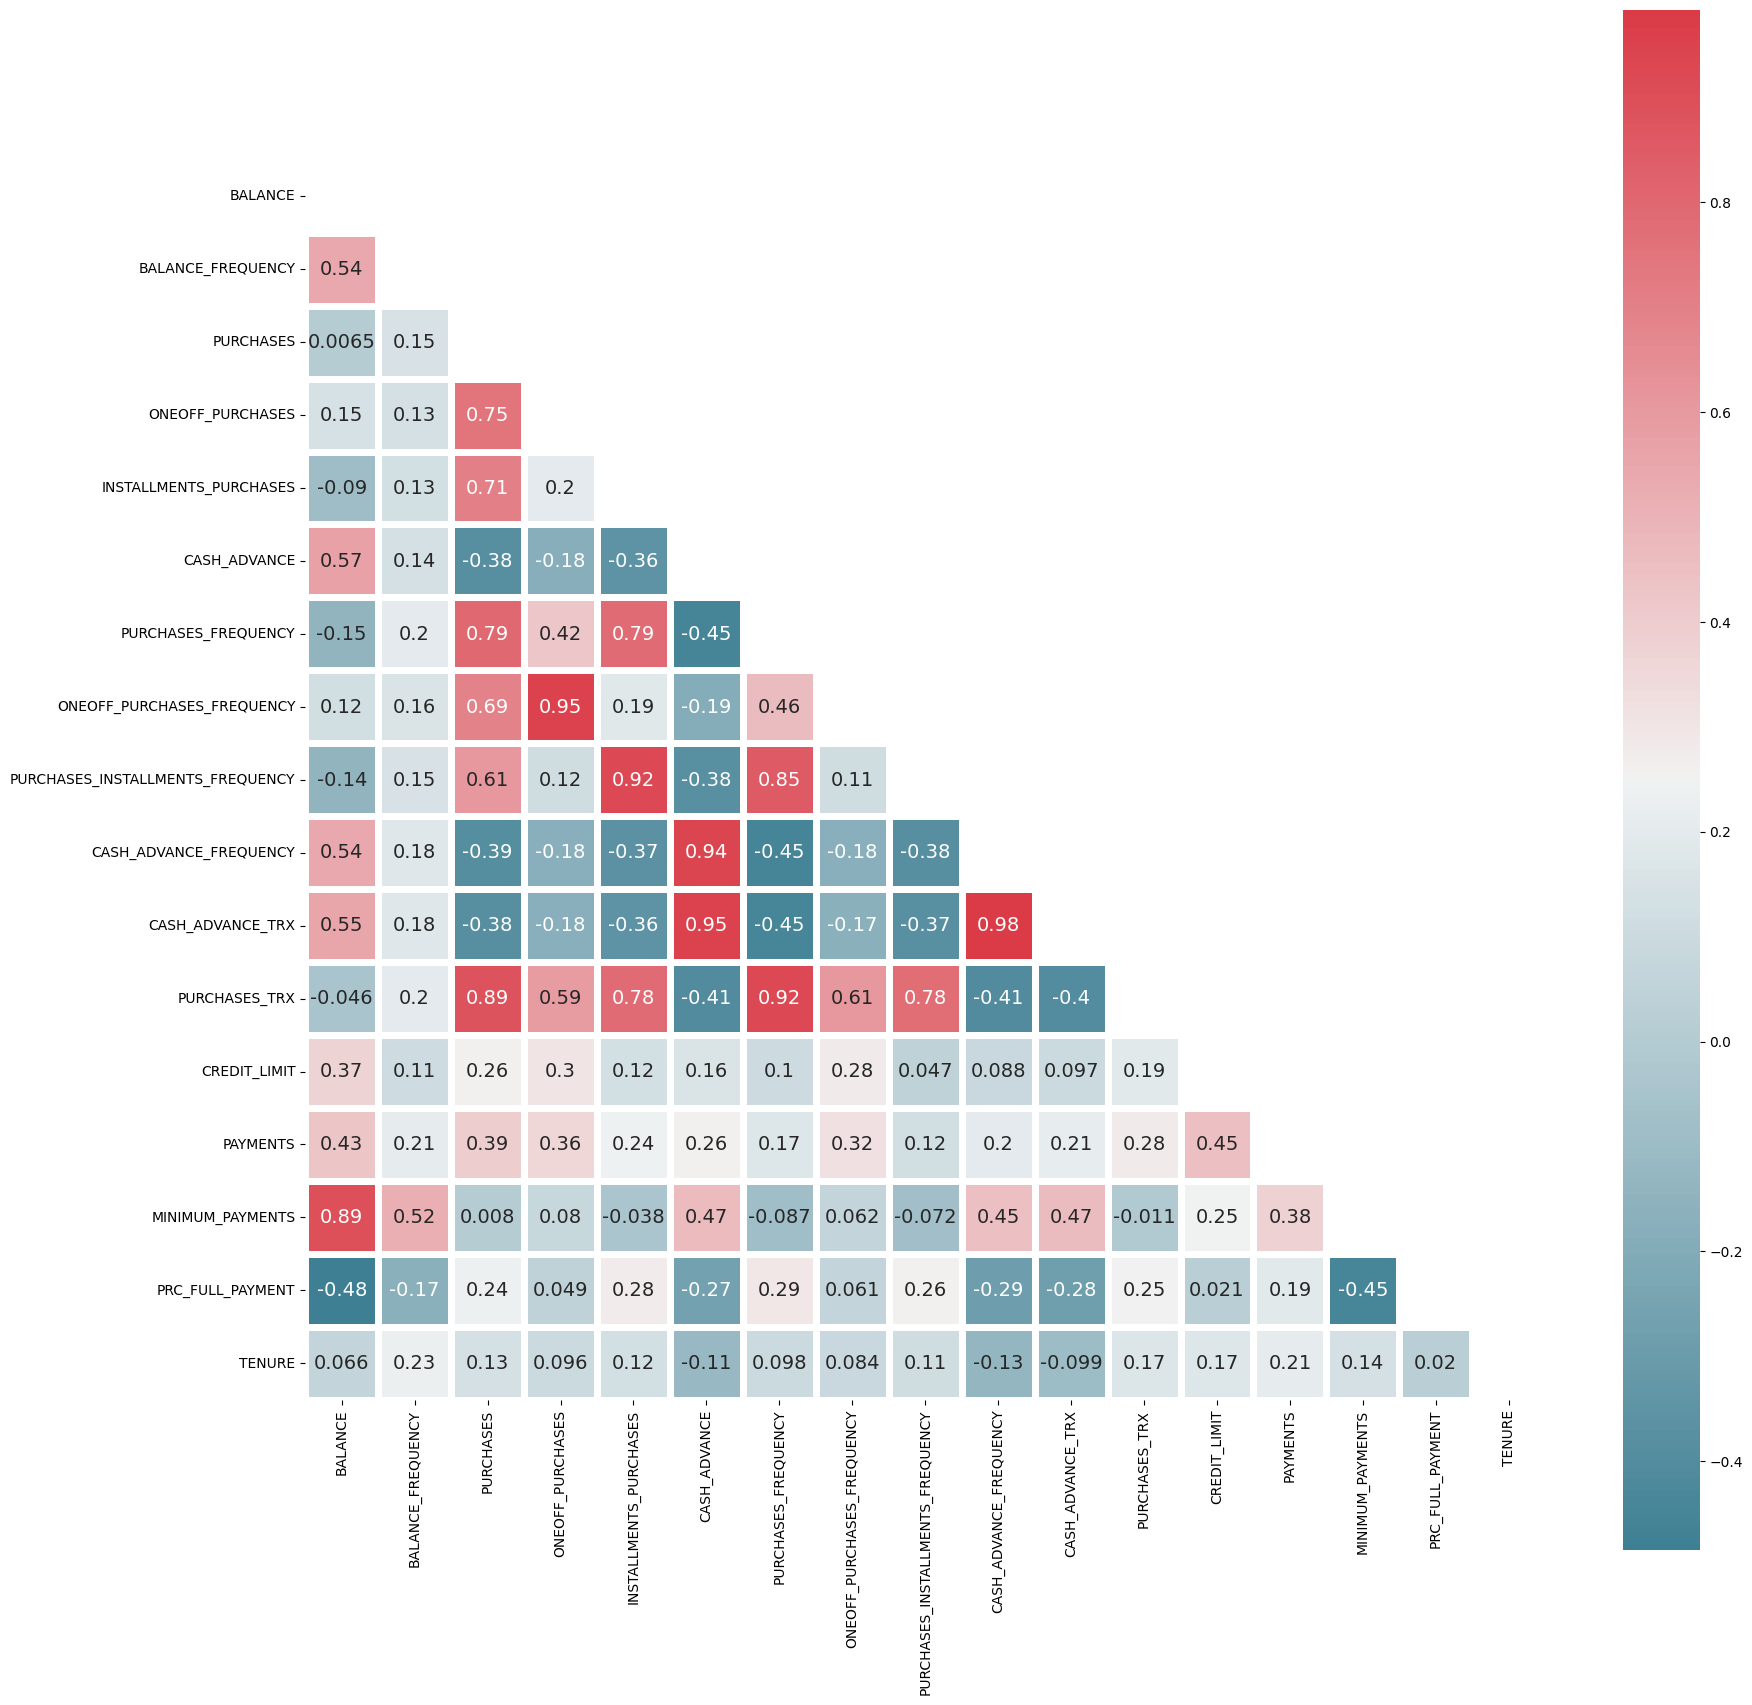

In [19]:
# Correlation analysis to spot any trends, relationships, or dependencies between features in the dataset
# I chose to use spearman correlation as the data is not normally distributed and it includes outliers.
correlation_df2 = df2.corr(method='spearman')

# Setting up the plot:
fig, ax = plt.subplots()
ax.figure.set_size_inches(20, 20)

# Creating a Mask for the Heatmap
mask = np.triu(np.ones_like(correlation_df2, dtype=np.bool))

# Choosing a colour palate
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plotting the Heatmap
sns.heatmap(correlation_df2, cmap=cmap, mask=mask, square=True,linewidths= 5, annot=True, annot_kws={'size':14})
plt.show()

Observing the data, we can see that there are numerous pairs of strong correlation above the abs value 0.7, I will be removing them by keeping just one of the highly correlated features. Based on the most important features for risk profiling, such as One-Off Purchases, Minimum payment and Balance

In [20]:
#printing all the highly correlated features.
high_corr = [(col1, col2) for col1 in correlation_df2.columns for col2 in correlation_df2.columns if correlation_df2.loc[col1, col2] > 0.9 and col1 != col2]
print(high_corr)

[('ONEOFF_PURCHASES', 'ONEOFF_PURCHASES_FREQUENCY'), ('INSTALLMENTS_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY'), ('CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY'), ('CASH_ADVANCE', 'CASH_ADVANCE_TRX'), ('PURCHASES_FREQUENCY', 'PURCHASES_TRX'), ('ONEOFF_PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES'), ('PURCHASES_INSTALLMENTS_FREQUENCY', 'INSTALLMENTS_PURCHASES'), ('CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE'), ('CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX'), ('CASH_ADVANCE_TRX', 'CASH_ADVANCE'), ('CASH_ADVANCE_TRX', 'CASH_ADVANCE_FREQUENCY'), ('PURCHASES_TRX', 'PURCHASES_FREQUENCY')]


In [21]:
#Dropping the features that represent similar data

df3 = df2.drop(['ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX','PURCHASES_FREQUENCY'],axis=1)

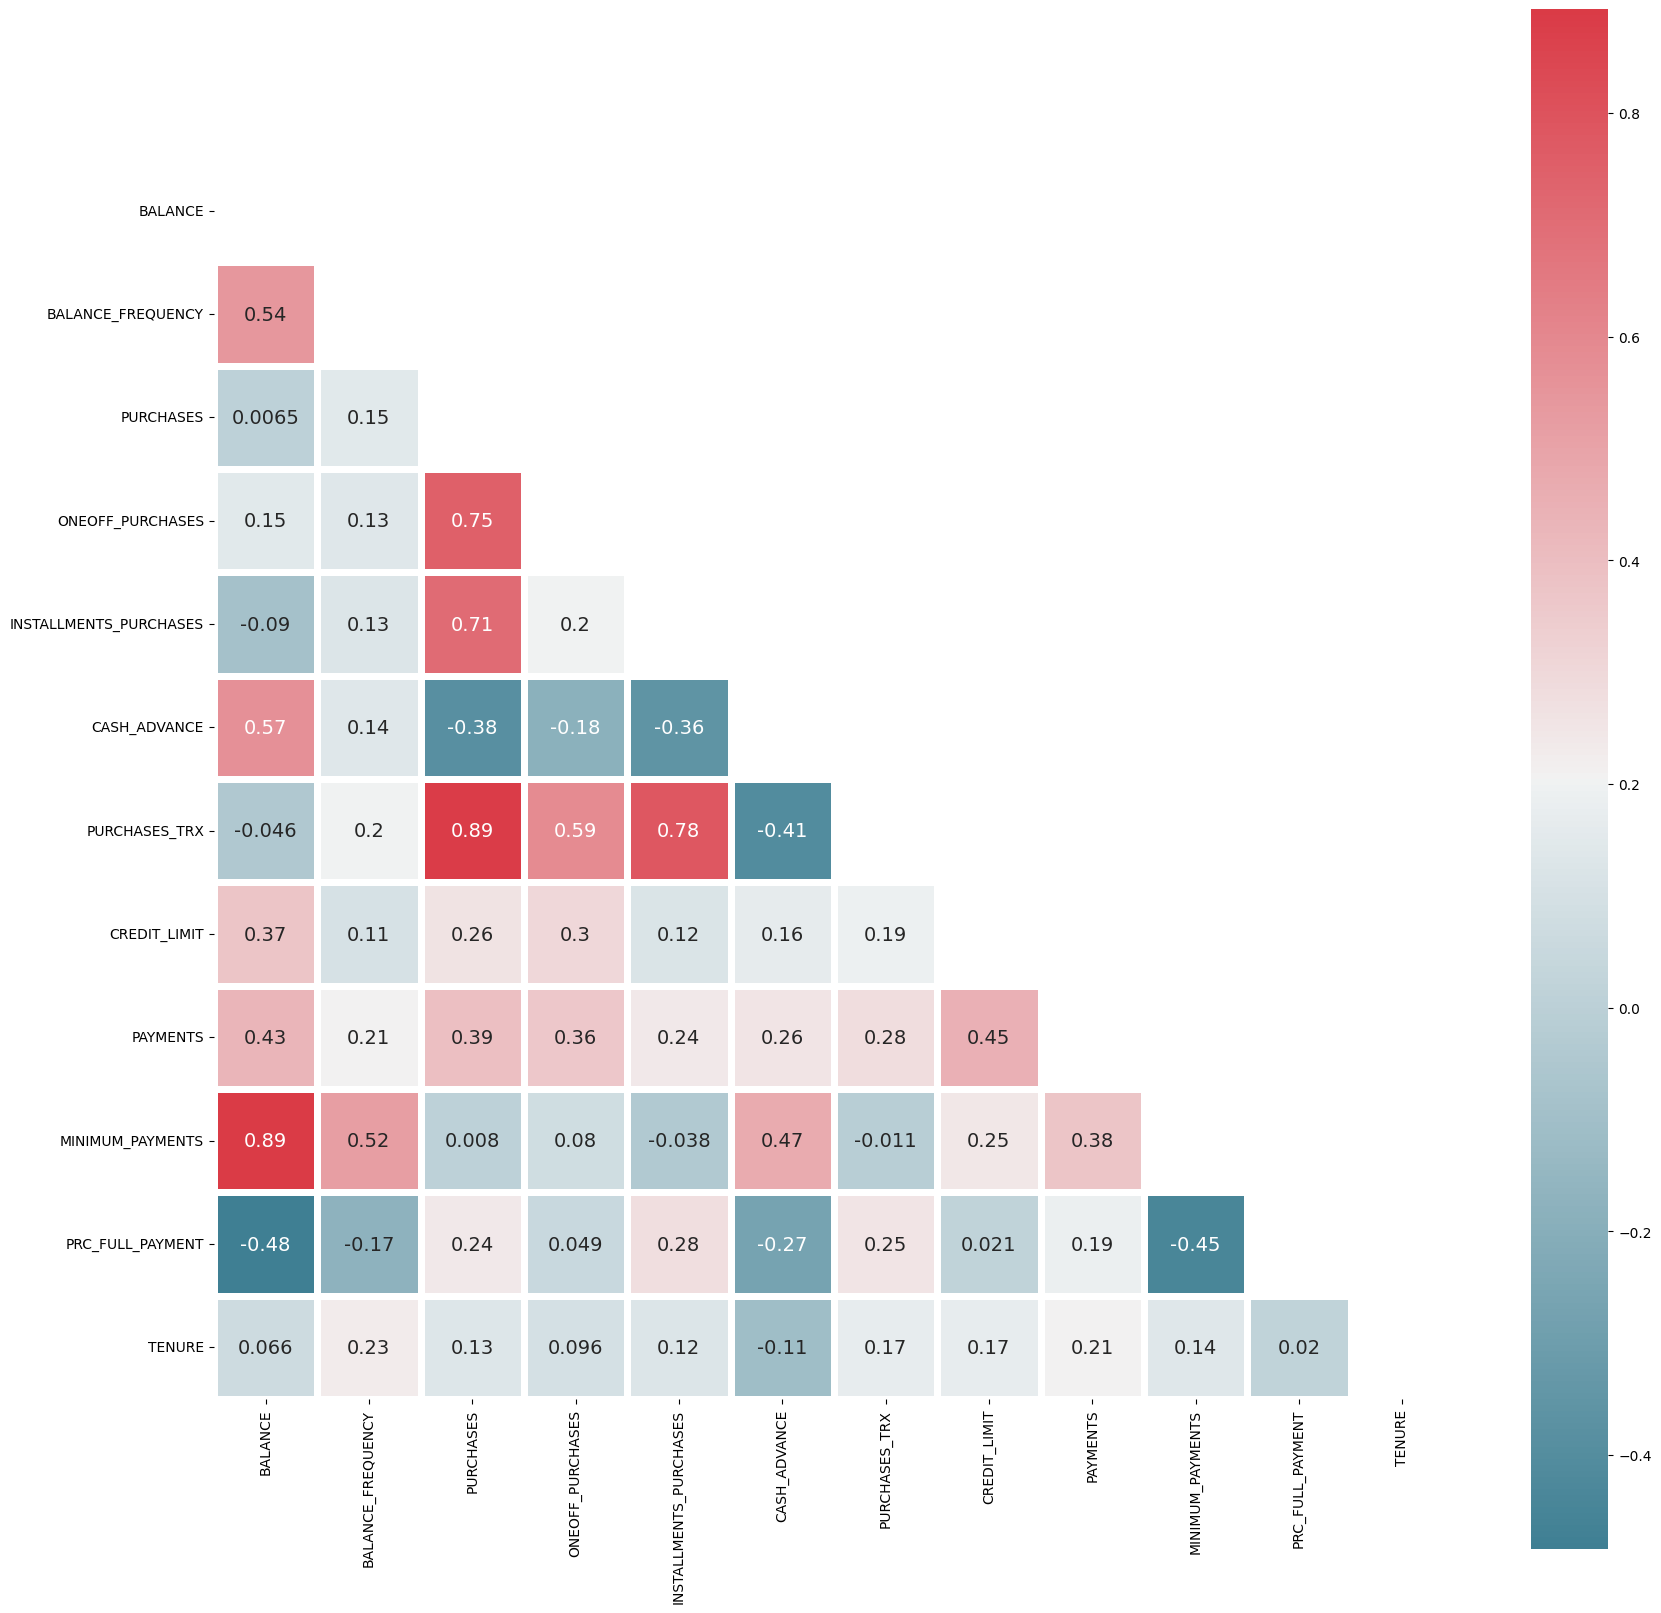

In [22]:
#visualising the heatmap after removing the features that were similar.

correlation_df3 = df3.corr(method='spearman')

# Setting up the plot:
fig, ax = plt.subplots()
ax.figure.set_size_inches(20, 20)

# Creating a Mask for the Heatmap
mask = np.triu(np.ones_like(correlation_df3, dtype=np.bool))

# Choosing a colour palate
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Plotting the Heatmap
sns.heatmap(correlation_df3, cmap=cmap, mask=mask, square=True,linewidths= 5, annot=True, annot_kws={'size':14})
plt.show()

## Principal Component Analysis (PCA)

Some of the features are likely redundant as the high correlation coefficients in these pairs suggest strong relationships, and may have similar information to the other, I will be performing a Principal Component Analysis (PCA) for dimensionality reduction and i will retain direct features.

In [23]:
# Retaining direct features, that are essential for risk profiling
direct_features = ['ONEOFF_PURCHASES', 'BALANCE', 'PAYMENTS','CREDIT_LIMIT', 'CASH_ADVANCE']
remaining_features = [col for col in df3.columns if col not in direct_features]


# Standardising the data as PCA is affected by the scale of the data.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df3)

#Seperating scaled features
scaled_df = pd.DataFrame(scaled_data, columns=df3.columns)
scaled_direct_features = scaled_df[direct_features]
scaled_remaining_features = scaled_df[remaining_features]



### Checking for optimal number of components

In [24]:
#Performing PCA
pca = PCA()
pca.fit(scaled_remaining_features)

# Calculating cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Identifying the number of components
num_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components for 95% variance: {num_components}")

Number of components for 95% variance: 6


### Performing PCA

In [25]:
#Performing PCA to reduce dimensionality.

#Specifiyig the number of componenets, based on previous result
pca = PCA(n_components=num_components)

principal_components = pca.fit_transform(scaled_remaining_features)

column_names = [f'PC{i+1}' for i in range(num_components)]
pca_df = pd.DataFrame(data=principal_components, columns=column_names)

explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)



[0.3546674  0.18221688 0.13748845 0.12102352 0.11027497 0.05231932]


In [26]:
# Combining the direct features and the PCA components
final_data = np.hstack([scaled_direct_features, pca_df])
final_df = pd.DataFrame(final_data, columns=direct_features + [f'PC{i+1}' for i in range(pca_df.shape[1])])
len_final_df = len(final_df.columns)
print(len_final_df)
final_df.head()

11


,ONEOFF_PURCHASES,BALANCE,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.356934,-0.731989,-0.528979,-0.960362,-0.466786,-0.834012,-0.202885,0.370126,-0.128642,-0.463248,0.136781
1,-0.356934,0.786961,0.818642,0.688686,2.605605,-0.711656,-0.187833,0.441027,-0.108902,0.473394,0.099422
2,0.108889,0.447135,-0.383805,0.826107,-0.466786,-0.330586,-0.677674,0.360775,0.350516,-0.186990,-0.187723
3,0.546189,0.049099,-0.598688,0.826107,-0.368653,-0.667521,0.172245,0.173001,-0.759994,-0.786227,-0.028227
4,-0.347294,-0.358775,-0.364368,-0.905393,-0.466786,-0.792197,-0.632859,0.469239,0.416490,-0.133622,0.142272


## Interpreting the components

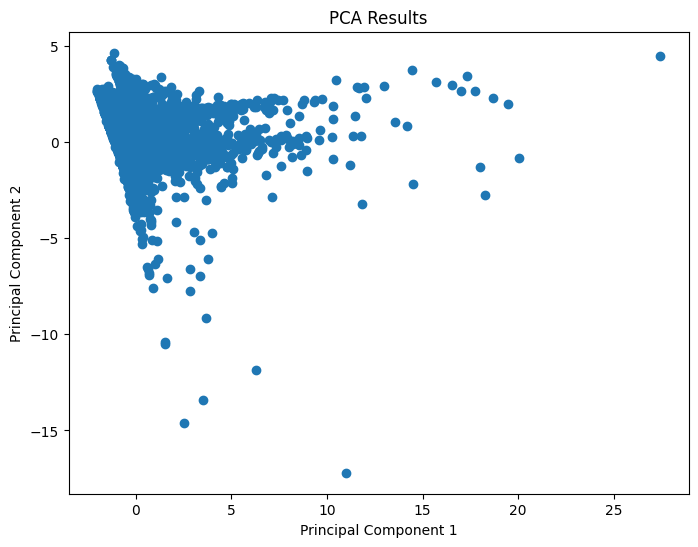

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['PC1'], final_df['PC2'])
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


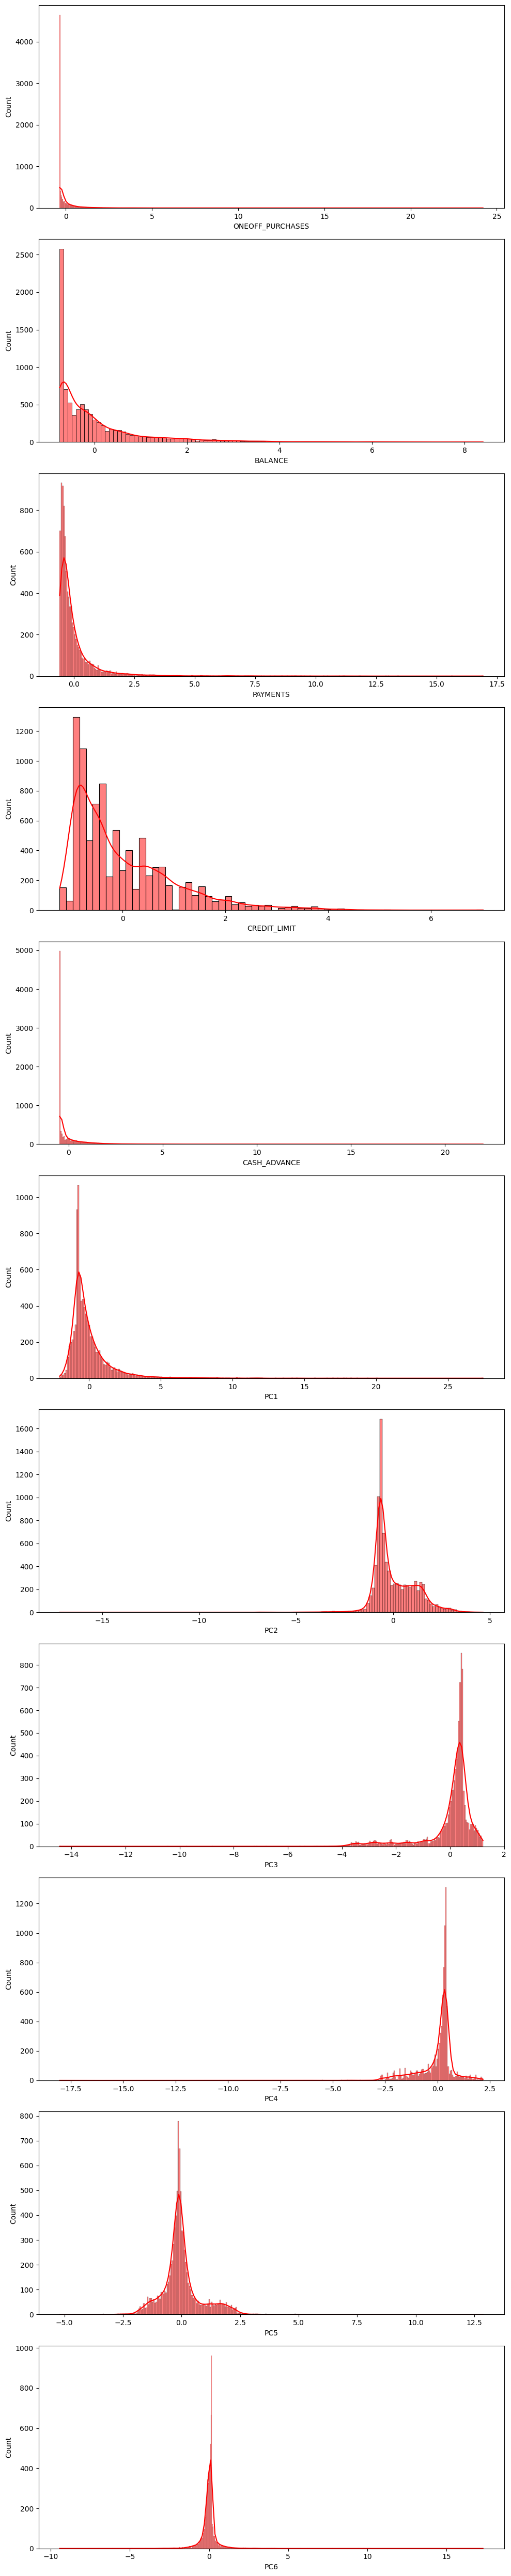

In [28]:
fig, ax = plt.subplots(len_final_df,1,figsize=(10,50))
for i, col in enumerate(final_df):
    sns.histplot(final_df[col], kde=True, ax=ax[i], color='red')
fig.tight_layout()
plt.show()

Need to analyse the data hre...

# Clustering Models

I will perform 4 Clustering models, my data has outliers and may have irregular clustering so I will keep this in mind.
I plan to use K-Means to start off, and then will try DBSCAN which is suitable to handle outliers and to detect non-linear clusters, I will also use GMM for similar reasons, finally I will try HCA as well. I will compare my results using metrics like silhouette score and the Davies-Bouldin index to access my results.

## K Means

In [29]:
kmeans_final_df = final_df.copy()
kmeans_df = df3.copy()

### Finding the optimal number of clusters

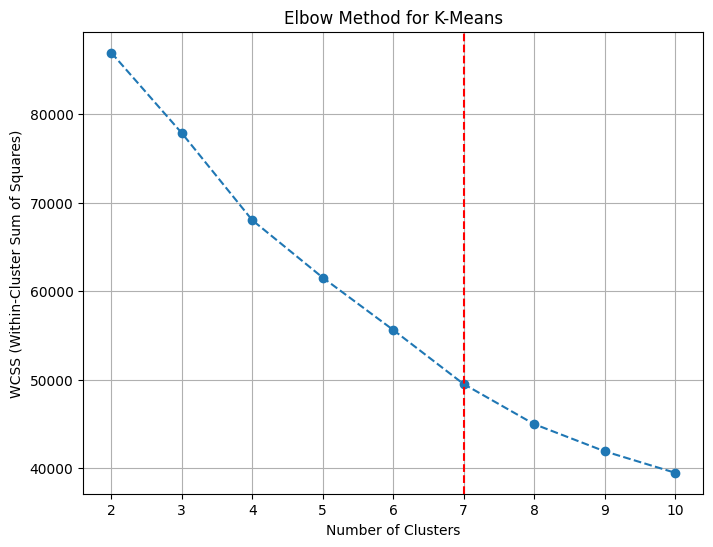

In [30]:
# Initialize WCSS list
wcss = []

# Iterate over a range of cluster numbers
for i in range(2, len_final_df):
    kmeans = KMeans(n_clusters=i, random_state=2025)
    kmeans.fit(kmeans_final_df)
    wcss.append(kmeans.inertia_)

# Locate the elbow
k1 = KneeLocator(range(2,len_final_df),wcss,curve="convex",direction="decreasing")
kmeans_optimal_clusters = k1.elbow

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(2, len_final_df), wcss, marker='o', ls='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.axvline(x=kmeans_optimal_clusters,color="r",label="Optimal Clusters",ls="--")
plt.title('Elbow Method for K-Means')
plt.grid()
plt.show()


Based on the elbow method, the optimal number of clusters for kmeans algorithm is equal to 7.

In [31]:
# Test silhouette score for the chosen number of clusters
kmeans = KMeans(n_clusters=kmeans_optimal_clusters, random_state=2025)
kmeans.fit(final_df)
labels = kmeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(kmeans_final_df, labels)
print(f"Silhouette Score for {kmeans_optimal_clusters} clusters: {silhouette_avg}")

Silhouette Score for 7 clusters: 0.31522125943772106


The silhouette score ranges from -1 to 1, 0.3 suggests that there is weak or overlapping clusters, this can also be seen in the scatter plot as there is overlapping in the scatter plot shown previously.

### Performing K Means

In [32]:
kmeans = KMeans(n_clusters=kmeans_optimal_clusters, random_state=2025)
kmeans_cluster_labels = kmeans.fit_predict(kmeans_final_df)
kmeans_final_df['Cluster'] = kmeans_cluster_labels
kmeans_final_df.head()

,ONEOFF_PURCHASES,BALANCE,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE,PC1,PC2,PC3,PC4,PC5,PC6,Cluster
0,-0.356934,-0.731989,-0.528979,-0.960362,-0.466786,-0.834012,-0.202885,0.370126,-0.128642,-0.463248,0.136781,2
1,-0.356934,0.786961,0.818642,0.688686,2.605605,-0.711656,-0.187833,0.441027,-0.108902,0.473394,0.099422,3
2,0.108889,0.447135,-0.383805,0.826107,-0.466786,-0.330586,-0.677674,0.360775,0.350516,-0.186990,-0.187723,2
3,0.546189,0.049099,-0.598688,0.826107,-0.368653,-0.667521,0.172245,0.173001,-0.759994,-0.786227,-0.028227,1
4,-0.347294,-0.358775,-0.364368,-0.905393,-0.466786,-0.792197,-0.632859,0.469239,0.416490,-0.133622,0.142272,2


In [33]:
kmeans_sil_score = round(silhouette_score(kmeans_final_df.iloc[:, :-1], kmeans_cluster_labels),2)
print(f"Silhouette Score: {kmeans_sil_score}")

Silhouette Score: 0.32


### Visualisng

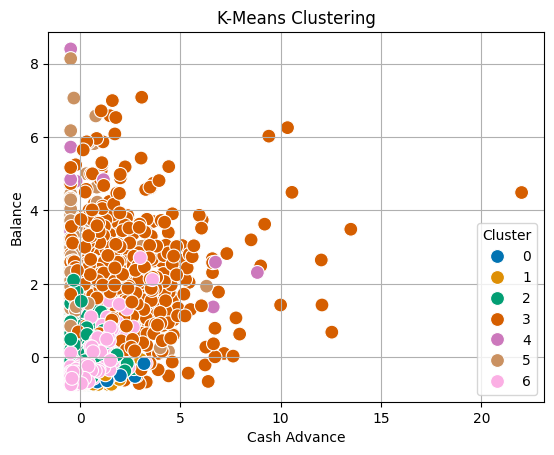

In [34]:
sns.scatterplot(x=kmeans_final_df['CASH_ADVANCE'], y=kmeans_final_df['BALANCE'], hue=kmeans_final_df['Cluster'], palette='colorblind', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Cash Advance')
plt.ylabel('Balance')
plt.legend(title='Cluster')
plt.grid()
plt.show()

In [35]:
cluster_summary = kmeans_final_df.groupby('Cluster').mean()
print(cluster_summary)

         ONEOFF_PURCHASES   BALANCE  PAYMENTS  CREDIT_LIMIT  CASH_ADVANCE  \
Cluster                                                                     
0               -0.000773 -0.689557 -0.081658      0.143866     -0.426440   
1               -0.242740 -0.684363 -0.230271     -0.220347     -0.278111   
2               -0.159369 -0.118433 -0.228004     -0.304290     -0.193277   
3               -0.131088  1.909988  0.813929      1.246387      1.782311   
4               10.600367  1.923051  8.098975      3.044077      0.419625   
5                1.701918  0.687788  1.164384      1.076368     -0.163618   
6               -0.204236 -0.307224 -0.384336     -0.544353      0.085324   

               PC1       PC2       PC3       PC4       PC5       PC6  
Cluster                                                               
0         0.670007  1.393516  0.728061 -0.108932  1.377964  0.040641  
1        -0.992400  1.064181  0.049077 -1.536222 -0.935067 -0.068630  
2        -0.274158 -0.

In [36]:
# Adding clusters to the orginal dataset
kmeans_df['Cluster'] = kmeans_final_df['Cluster']
print(kmeans_df.head())


       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_TRX  CREDIT_LIMIT  \
0                    95.4      0.000000            2.0        1000.0   
1                     0.0   6442.945483            0.0        7000.0   
2                     0.0      0.000000           12.0        7500.0   
3                     0.0    205.788017            1.0        7500.0   
4                     0.0      0.000000            1.0        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000    12.0        2  
1  4103.032597       1072.3402

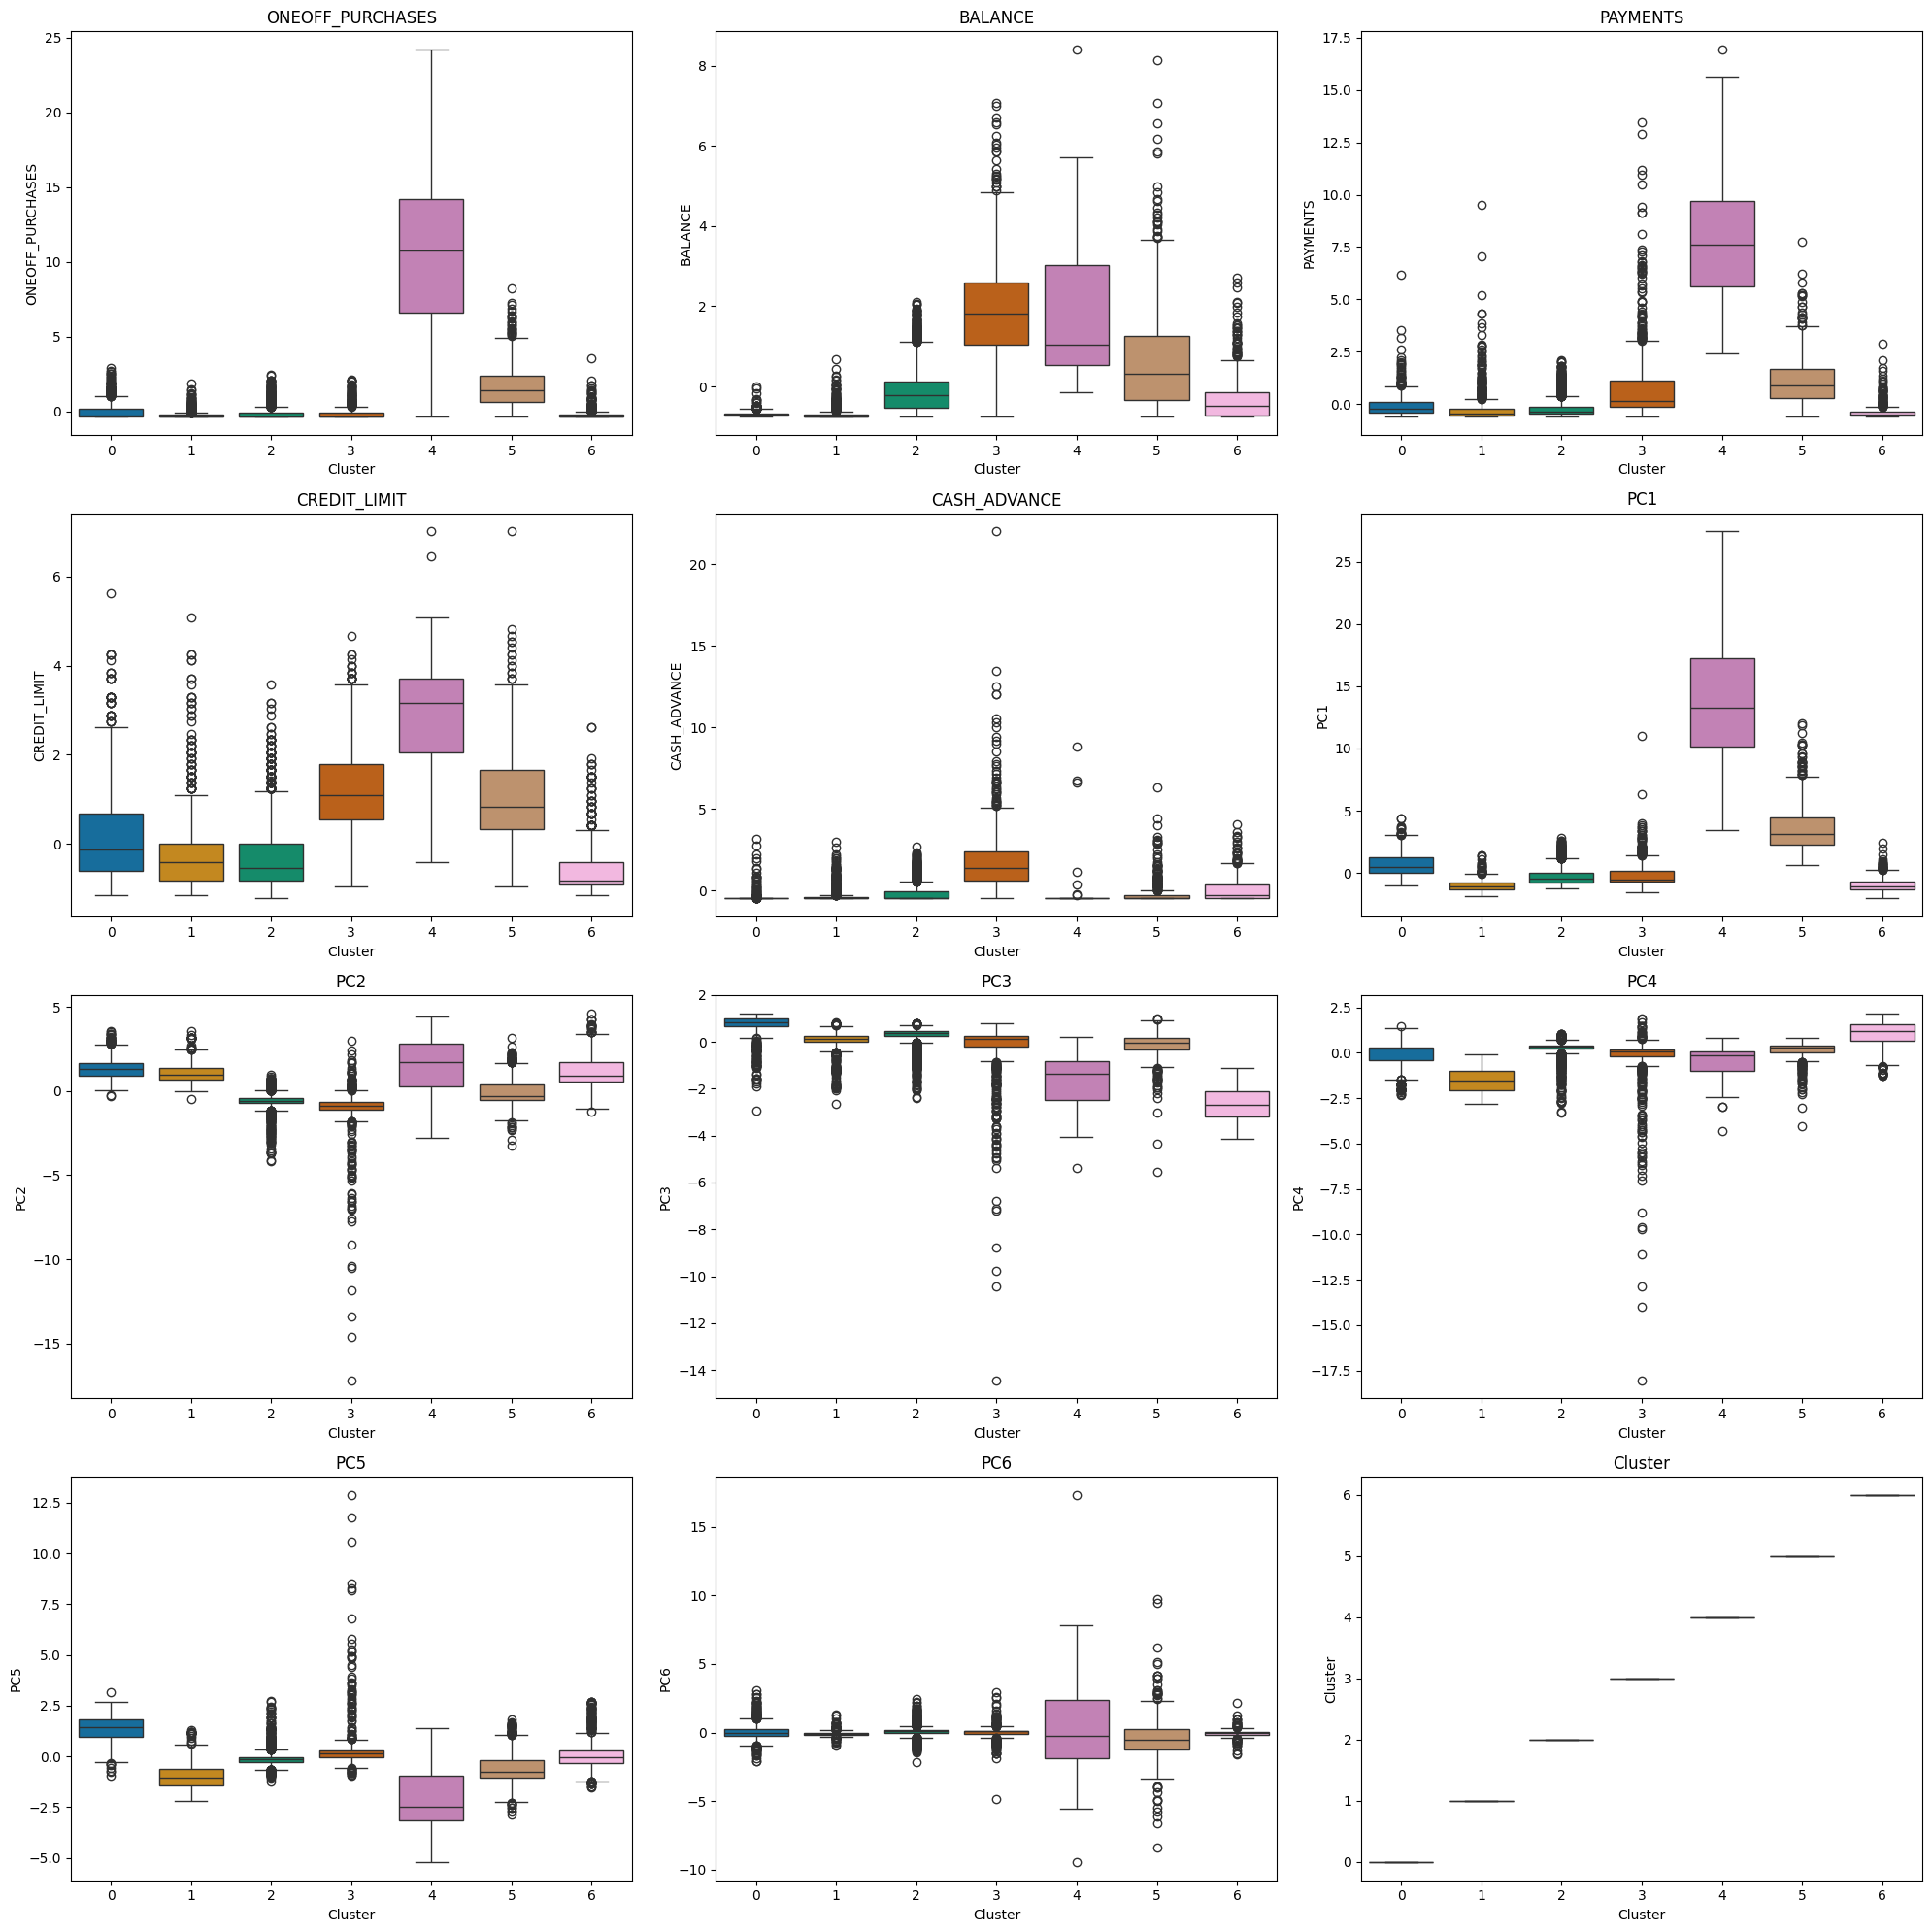

In [37]:
# Visualising the subplots for all features

num_features = len(kmeans_final_df.columns)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))

for i, feature in enumerate(kmeans_final_df.columns):
    row, col = divmod(i, num_cols)
    sns.boxplot(x='Cluster', y=feature, data=kmeans_final_df, palette='colorblind', ax=axes[row, col])
    axes[row, col].set_title(feature)

plt.tight_layout()
plt.show()

## Density Based Spatial Clustering of Applications with Noise (DBSCAN)

In [38]:
dbscan_final_df = final_df.copy()
dbscan_df = df3.copy()

### Finding the optimal epison value using the nearest neighbors plot.

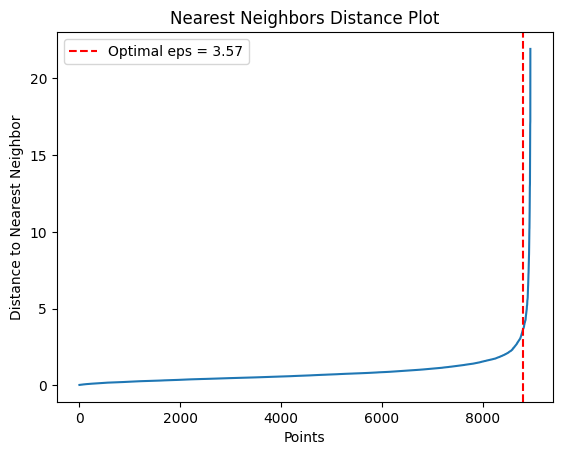

In [39]:
# Fit the NearestNeighbors model
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(dbscan_final_df)
distances, indices = neighbors_fit.kneighbors(dbscan_final_df)

# Sorting distances of the nearest neighbor
distances = np.sort(distances[:, -1])

#Find the elbow point
dbscan_elbow = KneeLocator(range(len(distances)), distances, curve='convex', direction='increasing')
if dbscan_elbow.knee is not None:
    dbscan_optimal_eps = distances[dbscan_elbow.knee]
else:
    dbscan_optimal_eps = np.percentile(distances, 95)


# Visualise the eps plot
plt.plot(distances)
plt.axvline( x=dbscan_elbow.knee, color='red', linestyle='--', label=f'Optimal eps = {dbscan_optimal_eps:.2f}')
plt.title('Nearest Neighbors Distance Plot')
plt.xlabel('Points')
plt.ylabel(f'Distance to Nearest Neighbor')
plt.legend()
plt.show()

### Performing the DBSCAN

In [40]:
# Initialise DBSCAN with the optimal eps and min_samples
min_samples = max(5, int(0.03 * len(dbscan_final_df)))  # 3% of the dataset
dbscan = DBSCAN(eps=dbscan_optimal_eps, min_samples=min_samples)
dbscan.fit(dbscan_final_df)

DBSCAN(eps=np.float64(3.572072779399042), min_samples=268)

In [41]:
# Get cluster labels
dbscan_cluster_labels = dbscan.labels_

# Add cluster labels to your DataFrame
dbscan_final_df['Cluster'] = dbscan_cluster_labels

In [42]:
num_clusters = len(set(dbscan_cluster_labels)) - (1 if -1 in dbscan_cluster_labels else 0)
print(f'Number of clusters (excluding noise): {num_clusters}')

Number of clusters (excluding noise): 1


In [43]:
num_noise_points = (dbscan_cluster_labels == -1).sum()  # Count noise points
noise_percentage = (num_noise_points / len(dbscan_cluster_labels)) * 100
print(f'Percentage of noise points: {noise_percentage:.2f}%')


Percentage of noise points: 2.26%


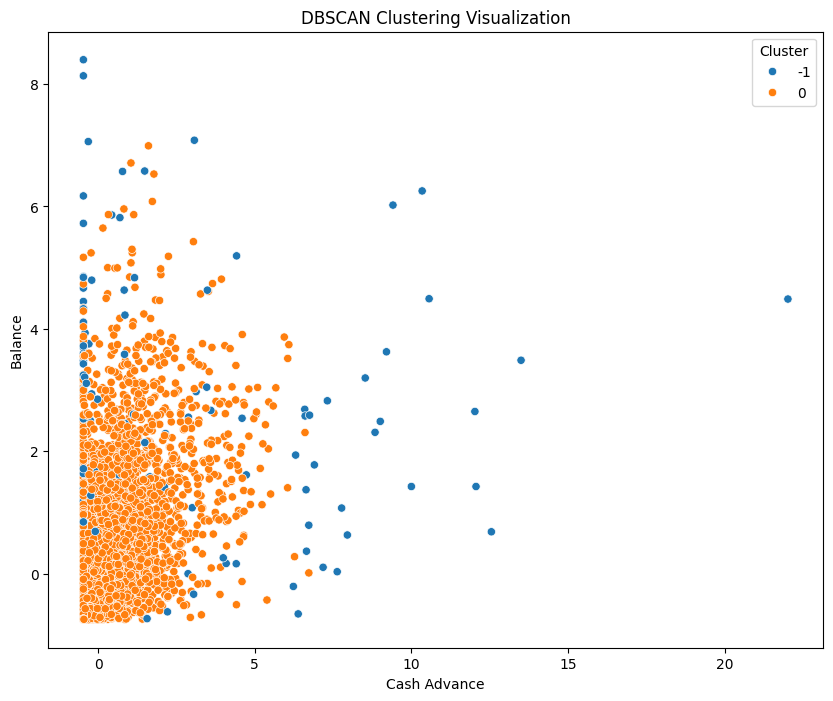

In [44]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=dbscan_final_df['CASH_ADVANCE'], y=dbscan_final_df['BALANCE'], hue=dbscan_final_df['Cluster'], palette='tab10', legend='full')
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('Cash Advance')
plt.ylabel('Balance')
plt.show()

In [45]:
# Accessing the cluster quality
if len(set(dbscan.labels_)) > 2:
    dbscan_sil_score = silhouette_score(dbscan_final_df.iloc[:, :-1], dbscan.labels_)
    print(f"Silhouette Score: {dbscan_sil_score:.2f}")
else:
    print("Silhouette score cannot be calculated with only one cluster.")

Silhouette score cannot be calculated with only one cluster.


## Gaussian Mixture Models (GMM)

In [46]:
gmm_final_df = final_df.copy()
gmm_df = df3.copy()

### Finding the best number of clusters.

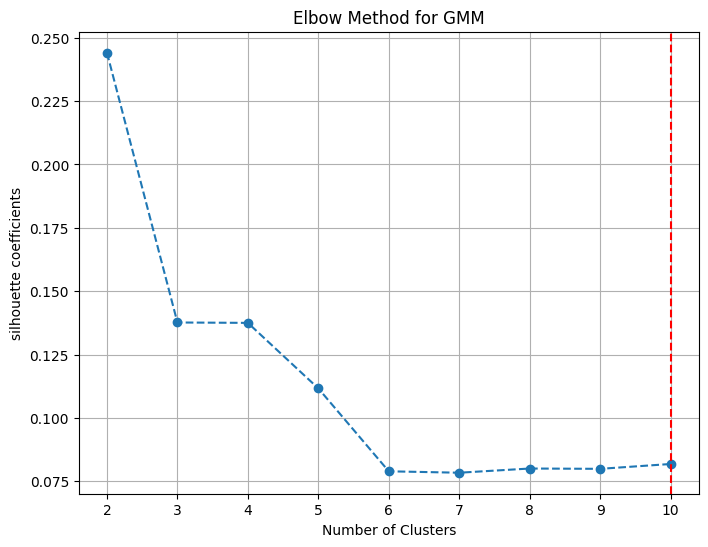

In [47]:
# Initialise empty list to store silhouette score
sil_gmm = []

# Iterate over a range of cluster numbers
for i in range(2,len_final_df):
  gmm = GaussianMixture(n_components=i, random_state=2025)
  gmm.fit(gmm_final_df)
  # Getting the silhouette score
  score = silhouette_score(gmm_final_df, gmm.predict(gmm_final_df),metric='euclidean')
  sil_gmm.append(score)

# Locate the elbow
gmm1 = KneeLocator(range(2,len_final_df),sil_gmm,curve="convex",direction="increasing")
gmm_optimal_clusters = gmm1.elbow

# Locating the elbow and plotting the graph
plt.figure(figsize=(8, 6))
plt.plot(range(2, len_final_df), sil_gmm, marker='o', ls='--')
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette coefficients')
plt.axvline(x=gmm_optimal_clusters, color='r',label='Optimal Clusters',ls='--')
plt.title('Elbow Method for GMM')
plt.grid()
plt.show()


### Performing the GMM

In [48]:
#Gmm with the optimal number of clusters
final_gmm = GaussianMixture(n_components=gmm_optimal_clusters, random_state=2025)
final_gmm.fit(gmm_final_df)
gmm_cluster_labels = final_gmm.predict(gmm_final_df)

In [49]:
#Adding the cluster labels to the pca dataframe
gmm_final_df['Cluster'] = gmm_cluster_labels
gmm_final_df.head()

,ONEOFF_PURCHASES,BALANCE,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE,PC1,PC2,PC3,PC4,PC5,PC6,Cluster
0,-0.356934,-0.731989,-0.528979,-0.960362,-0.466786,-0.834012,-0.202885,0.370126,-0.128642,-0.463248,0.136781,0
1,-0.356934,0.786961,0.818642,0.688686,2.605605,-0.711656,-0.187833,0.441027,-0.108902,0.473394,0.099422,3
2,0.108889,0.447135,-0.383805,0.826107,-0.466786,-0.330586,-0.677674,0.360775,0.350516,-0.186990,-0.187723,7
3,0.546189,0.049099,-0.598688,0.826107,-0.368653,-0.667521,0.172245,0.173001,-0.759994,-0.786227,-0.028227,2
4,-0.347294,-0.358775,-0.364368,-0.905393,-0.466786,-0.792197,-0.632859,0.469239,0.416490,-0.133622,0.142272,7


In [50]:
#Groupby clusters to summarise
cluster_summary = gmm_final_df.groupby('Cluster').mean()
print(cluster_summary)

         ONEOFF_PURCHASES   BALANCE  PAYMENTS  CREDIT_LIMIT  CASH_ADVANCE  \
Cluster                                                                     
0               -0.265549 -0.733747 -0.412904     -0.182847     -0.466786   
1               -0.274210 -0.721272 -0.464020     -0.522009     -0.466786   
2                0.227916 -0.559647  0.300219      0.128686     -0.255073   
3               -0.356934 -0.070249  0.024493     -0.247102      0.651641   
4                0.291054  0.414706  0.831768      0.482466      0.785192   
5                2.022446  0.879955  3.281380      1.261943      1.291754   
6                0.663841  1.172570  0.496850      0.530996     -0.013559   
7               -0.203623  0.338148 -0.293108     -0.115181     -0.043931   
8               -0.049053 -0.059883 -0.203182     -0.316940      0.222714   
9                0.245996 -0.624059 -0.006081      0.198350     -0.466786   

              PC1       PC2       PC3       PC4       PC5       PC6  
Clust

In [51]:
# Checking if Clustering is good using silhouette score
gmm_sil_score = round(silhouette_score(gmm_final_df.iloc[:, :-1], gmm_cluster_labels),2)
print(f"Silhouette Score: {gmm_sil_score}")

Silhouette Score: 0.08


### Visualising GMM Clusters

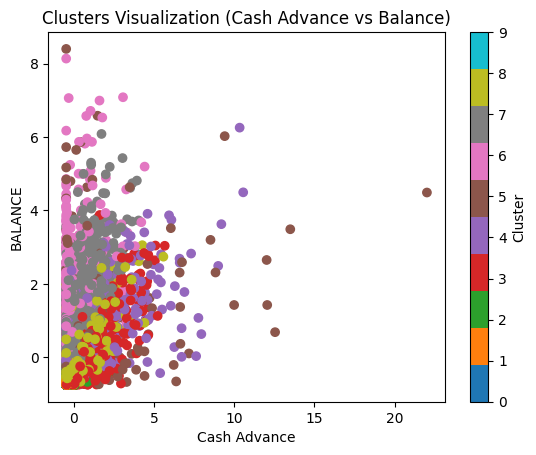

In [52]:
plt.scatter(gmm_final_df['CASH_ADVANCE'], gmm_final_df['BALANCE'], c=gmm_final_df['Cluster'], cmap='tab10')
plt.title('Clusters Visualization (Cash Advance vs Balance)')
plt.xlabel('Cash Advance')
plt.ylabel('BALANCE')
plt.colorbar(label='Cluster')
plt.show()

In [53]:
# Adding clusters to the orginal dataset
gmm_df['Cluster'] = gmm_final_df['Cluster']
print(gmm_df.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_TRX  CREDIT_LIMIT  \
0                    95.4      0.000000            2.0        1000.0   
1                     0.0   6442.945483            0.0        7000.0   
2                     0.0      0.000000           12.0        7500.0   
3                     0.0    205.788017            1.0        7500.0   
4                     0.0      0.000000            1.0        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000    12.0        0  
1  4103.032597       1072.3402

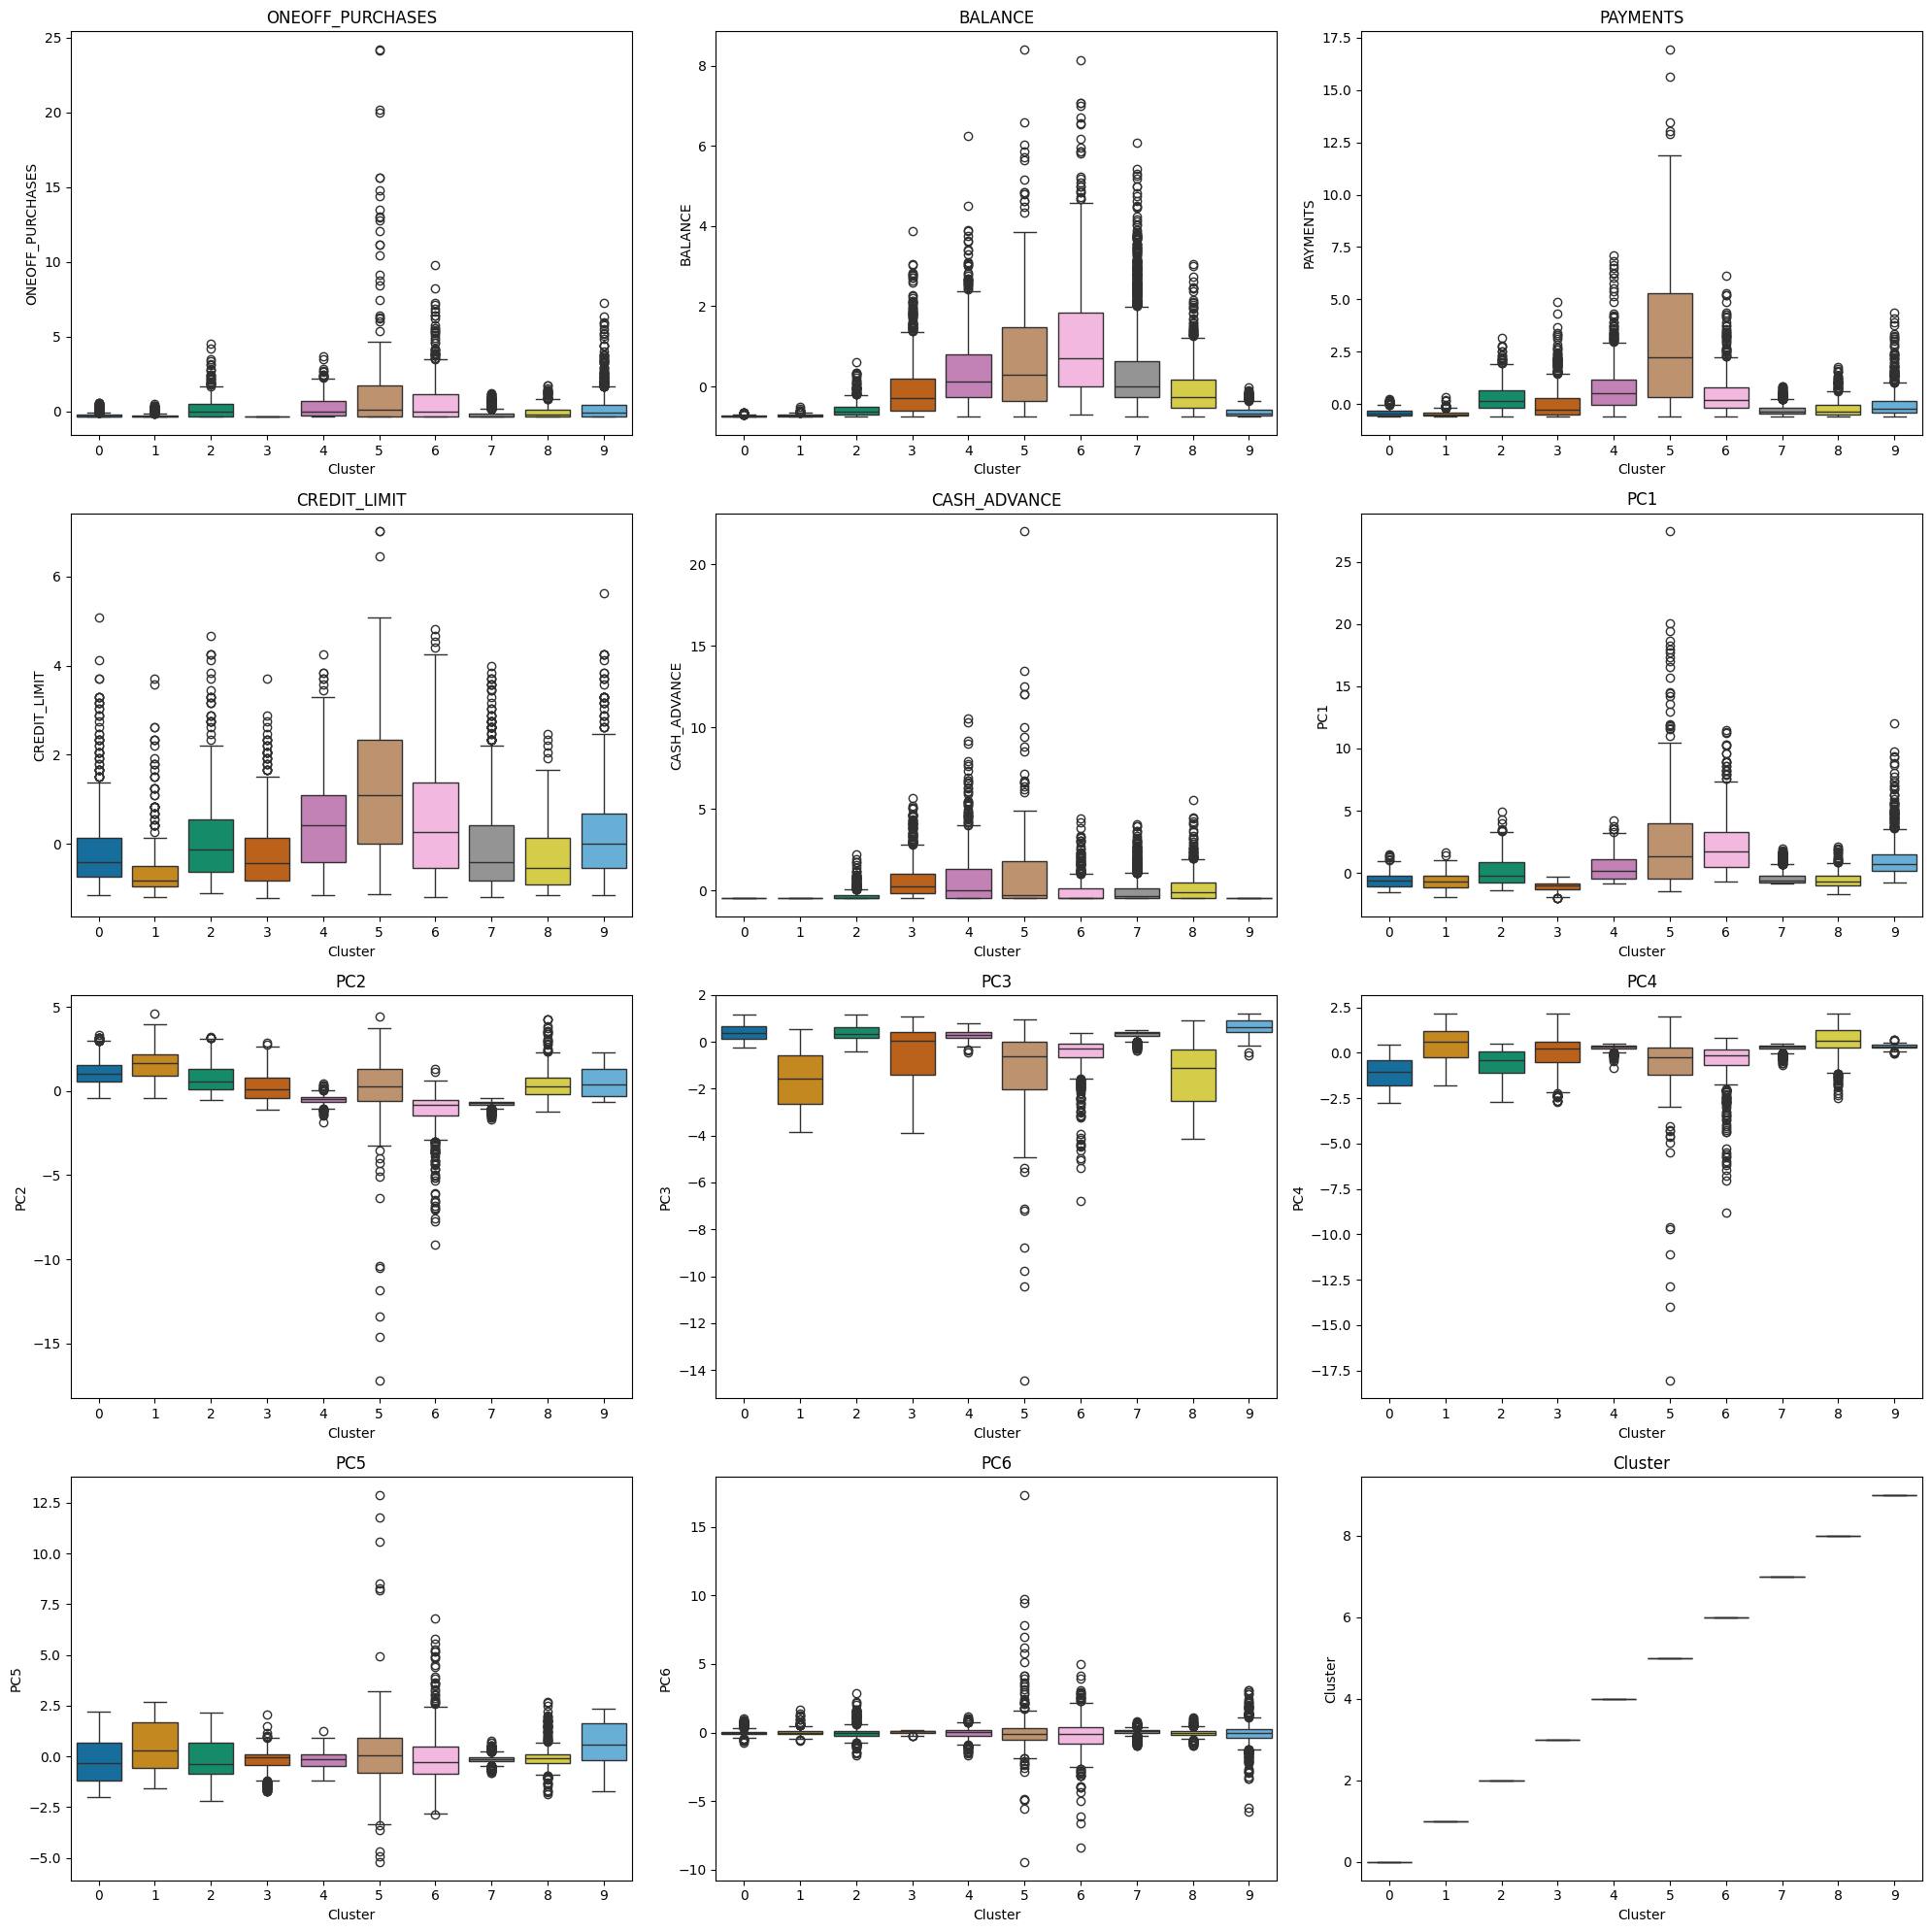

In [54]:
# Visualising the subplots for all features

num_features = len(gmm_final_df.columns)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))

for i, feature in enumerate(gmm_final_df.columns):
    row, col = divmod(i, num_cols)
    sns.boxplot(x='Cluster', y=feature, data=gmm_final_df, palette='colorblind', ax=axes[row, col])
    axes[row, col].set_title(feature)

plt.tight_layout()
plt.show()

## Hierarchial Clustering (HCA)

In [55]:
hca_final_df = final_df.copy()
hca_df = df3.copy()

### Finding the best numbers of clusters.

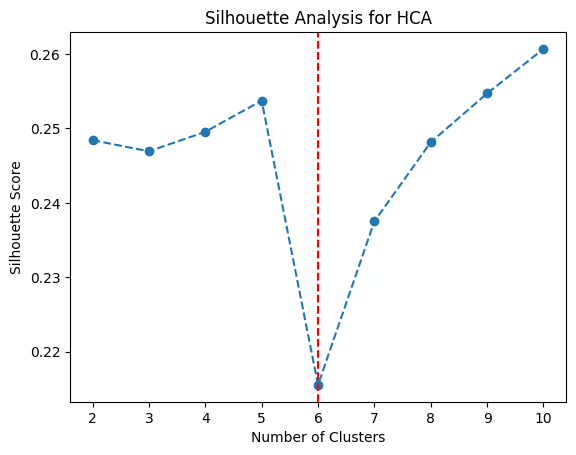

In [56]:
#Finding optimal clusteres using silhouttee score
sil_hca = []

for n_clusters in range(2, len_final_df):
    hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = hc.fit_predict(hca_final_df)
    score = silhouette_score(hca_final_df, labels)
    sil_hca.append(score)

# Locating the elbow
hca_knee = KneeLocator(range(2,len_final_df),sil_hca,curve="convex",direction="increasing")
hca_optimal_clusters = hca_knee.elbow

plt.plot(range(2, len_final_df), sil_hca, marker='o', linestyle='--')
plt.axvline(x=hca_optimal_clusters, color='r',label='Optimal Clusters',ls='--')
plt.title('Silhouette Analysis for HCA')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


### Performing HCA

In [57]:
#performing HCA using the optimal number of clusters
hc = AgglomerativeClustering(n_clusters=hca_optimal_clusters, linkage='ward')
hc.fit(hca_final_df)

hca_final_df['Cluster'] = hc.labels_
hca_final_df.head()

,ONEOFF_PURCHASES,BALANCE,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE,PC1,PC2,PC3,PC4,PC5,PC6,Cluster
0,-0.356934,-0.731989,-0.528979,-0.960362,-0.466786,-0.834012,-0.202885,0.370126,-0.128642,-0.463248,0.136781,5
1,-0.356934,0.786961,0.818642,0.688686,2.605605,-0.711656,-0.187833,0.441027,-0.108902,0.473394,0.099422,2
2,0.108889,0.447135,-0.383805,0.826107,-0.466786,-0.330586,-0.677674,0.360775,0.350516,-0.186990,-0.187723,2
3,0.546189,0.049099,-0.598688,0.826107,-0.368653,-0.667521,0.172245,0.173001,-0.759994,-0.786227,-0.028227,0
4,-0.347294,-0.358775,-0.364368,-0.905393,-0.466786,-0.792197,-0.632859,0.469239,0.416490,-0.133622,0.142272,5


In [58]:
# Checking if Clustering is good
hca_sil_score = round(silhouette_score(hca_final_df.iloc[:, :-1], hc.labels_),2)
print(f"Silhouette Score: {hca_sil_score}")

Silhouette Score: 0.22


The score is around 0 and suggestes that the clusters may be less distinict.

### Visualising Clusters

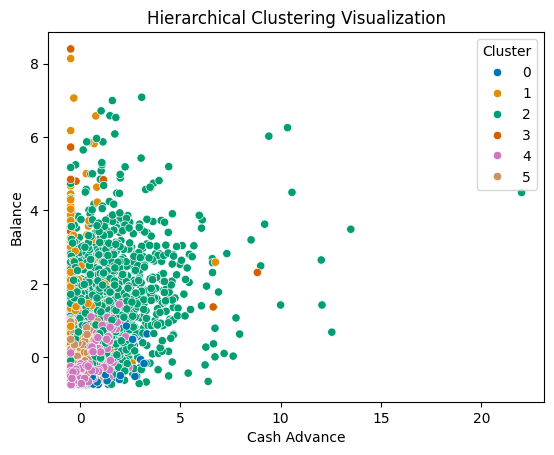

In [59]:
sns.scatterplot(
    x=hca_final_df['CASH_ADVANCE'],
    y=hca_final_df['BALANCE'],
    hue=hca_final_df['Cluster'],
    palette='colorblind'
)
plt.title('Hierarchical Clustering Visualization')
plt.xlabel('Cash Advance')
plt.ylabel('Balance')
plt.show()

In [60]:
# Adding clusters to the orginal dataset
hca_df['Cluster'] = hca_final_df['Cluster']
print(hca_df.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_TRX  CREDIT_LIMIT  \
0                    95.4      0.000000            2.0        1000.0   
1                     0.0   6442.945483            0.0        7000.0   
2                     0.0      0.000000           12.0        7500.0   
3                     0.0    205.788017            1.0        7500.0   
4                     0.0      0.000000            1.0        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0   201.802084        139.509787          0.000000    12.0        5  
1  4103.032597       1072.3402

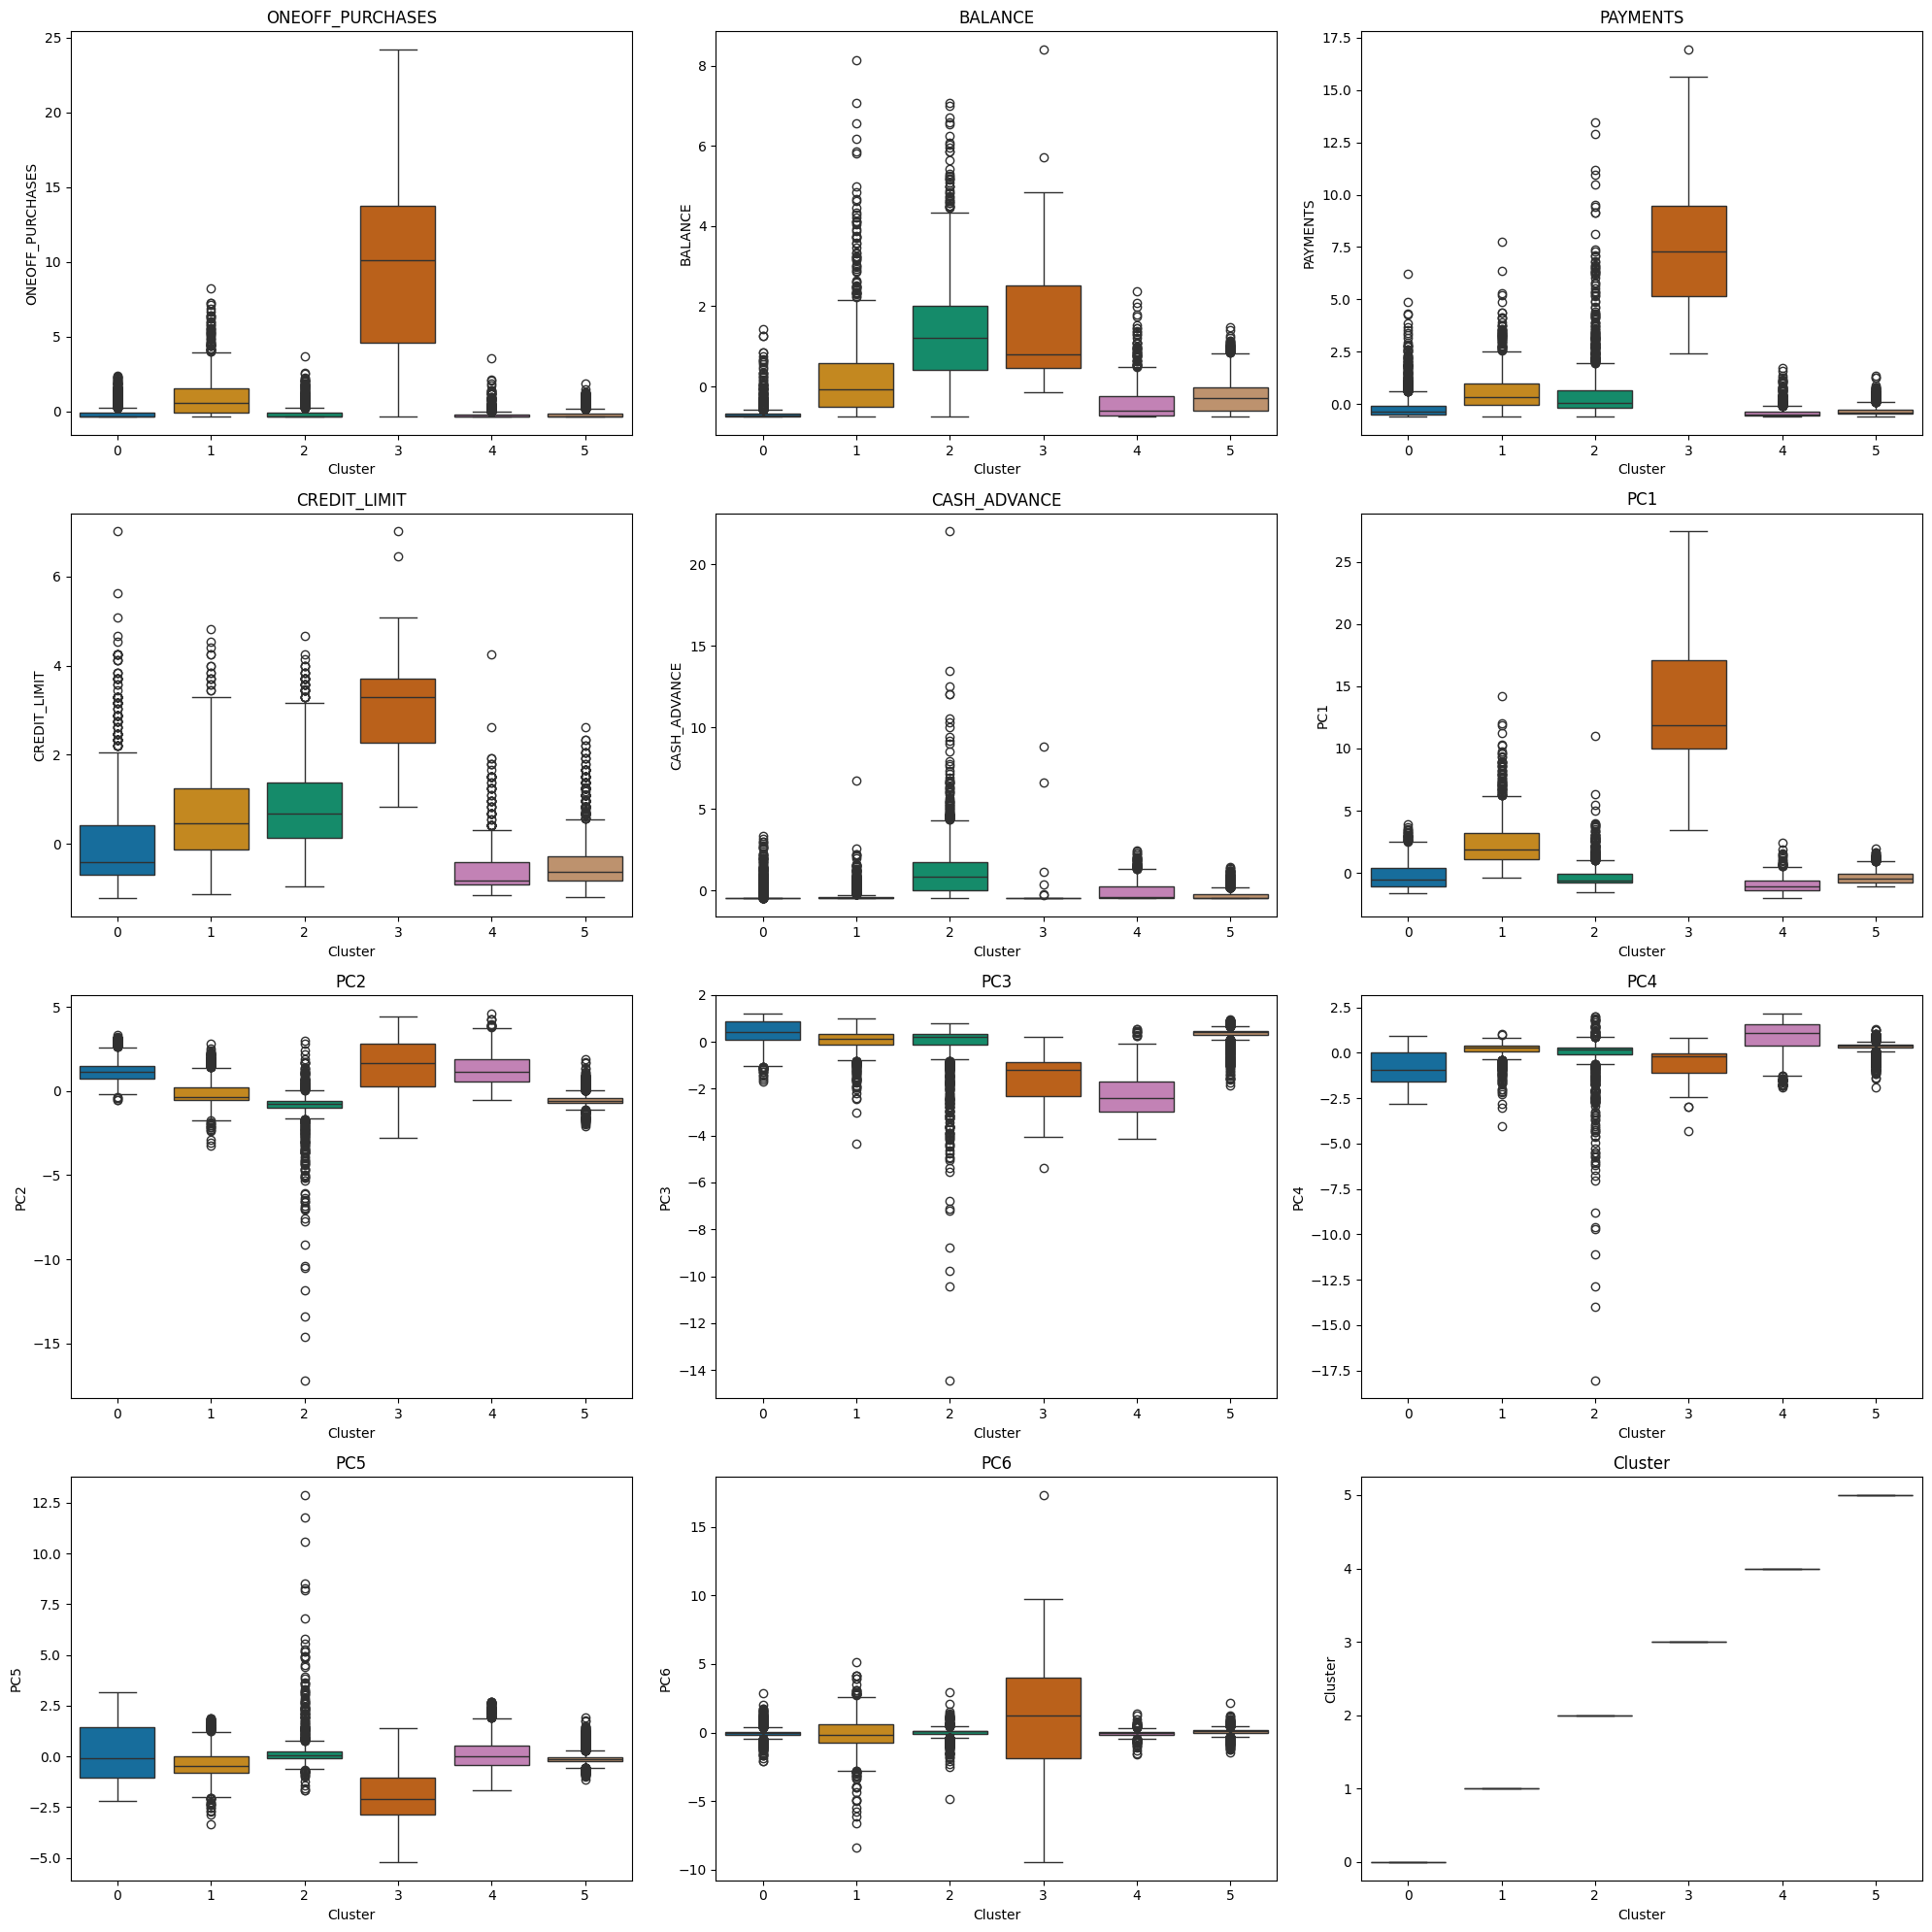

In [61]:
# Visualising the subplots for all features

num_features = len(hca_final_df.columns)
num_cols = 3
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))

for i, feature in enumerate(hca_final_df.columns):
    row, col = divmod(i, num_cols)
    sns.boxplot(x='Cluster', y=feature, data=hca_final_df, palette='colorblind', ax=axes[row, col])
    axes[row, col].set_title(feature)

plt.tight_layout()
plt.show()

# Accessing the Models

## Silhouette scores

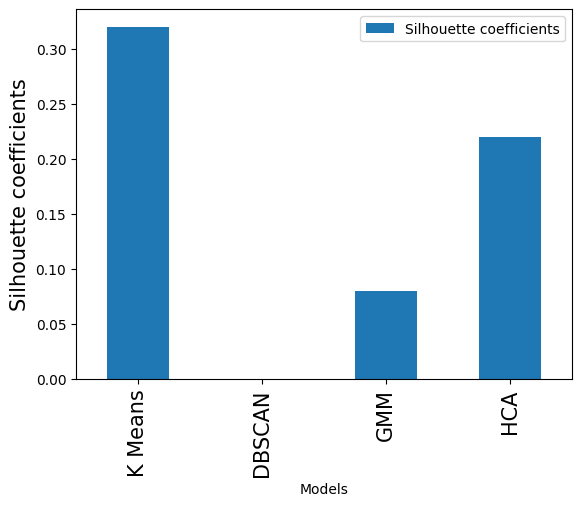

In [62]:
overall_sil = pd.DataFrame({
    'Models':['K Means','DBSCAN','GMM','HCA'],
    'Silhouette coefficients':[kmeans_sil_score, 0, gmm_sil_score, hca_sil_score]
    })
ax = overall_sil.plot.bar(x='Models', y='Silhouette coefficients', rot=90)
plt.xticks(fontsize=15)
plt.ylabel('Silhouette coefficients',fontsize=15)
plt.show()